# GML - Mini-Challenge 1 - FS 2022

**Ausgabe:** Montag, 21. März 2022  
**Abgabe:** Sonntag, 24. April 2022, bis 24 Uhr 

In dieser Mini-Challenge implementieren und verwenden wir verschiedene Supervised Learning-Methoden und machen Gebrauch von Model Selection-Prinzipien und -Algorithmen.

#### Vorgaben zu Umsetzung und Abgabe

- Code muss in python geschrieben werden.
- Wir entwickeln zahlreiche Algorithmen selber. Wenn nicht explizit anders verlangt, dürfen bloss die folgenden Bibliotheken verwendet werden: numpy, matplotlib, seaborn, pandas
- Der Code muss von Anfang bis Ende lauffähig sein bei Ausführung im Docker-Container des Trainingcenters. Nur was korrekt ausführt wird bewertet.
- Es darf kein Code ausgelagert werden.
- Sämtliche Plots sind komplett beschriftet (Achsen, Labels, Titel, Colorbar, ..), sodass der Plot einfach verstanden werden kann.
- Zu jedem Plot gehört eine kurze Diskussion, welche den Plot erklärt und die wichtigsten Einsichten die damit sichtbar werden festhält.  
- Als **Abgabe** zählt der letzte Commit in deinem Fork des Repos vor Abgabetermin.  


- **Bitte lösche, dupliziere oder verschiebe die vorhandenen Zellen nicht**. Dies führt zu Problemen bei der Korrektur. Du darfst aber beliebig viele weitere Zellen hinzufügen.
- Bitte importiere Daten mit **relativen Pfaden** innerhalb des Repos.

Für die Erarbeitung der Lösung darf unter Studierenden zusammengearbeitet werden. Die Zusammenarbeit ist dabei aber auf konzeptionelle und algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein Code oder Text von anderen oder vom Internet kopiert werden.**

---

### Aufgabe 1 (4 Punkte)

**Ridge Regression** (siehe beispielsweise James et al., *An Introduction to Statistical Learning*, 2015, pp 215) ist eine regularisierte Form ($l_2$-Regularisierung) der Ordinary Least Squares (OLS) Kostenfunktion für die lineare Regression.  

Die Ridge Regression-Kostenfunktion für einen Datensatz $(x^{(i)}, y^{(i)})$ mit $x^{(i)} = (x_1^{(i)}, \dots , x_p^{(i)})$ von $N$ Datenpunkten ist: 

\begin{equation}
J(\beta) = \sum_{i=1}^{N} (y^{(i)}-\beta_0 - \sum_{j=1}^{p} x^{(i)}_j\beta_j)^2 + \alpha\sum_{j=1}^{p} \beta_j^2 
\end{equation}

$(\beta_0, \beta_1, \dots, \beta_p)$ sind dabei die Modellkoeffizienten.

Es gilt zu beachten, dass bei Ridge Regression der Achsenabschnitt, i.e. der Modellkoeffizient $\beta_0$ nicht in den Penalty Term der Kostenfunktion eingeht. Das zeigt sich in obiger Gleichung durch die Summe von $i=1$ (nicht $i=0$) bis $p$ (Anzahl Prädiktoren).

Für die Optimierung der Koeffizienten bei gegebenem Datensatz ergeben sich dadurch Implikationen für Gradient Descent und Normalengleichung.  

Wenn man die Input-Variablen standardisiert, was **bei Regularisierung fast immer angezeigt** ist um sämtliche Variablen auf eine vergleichbare Skala (dimensionslose Standardabweichungen) zu bringen, und damit die zugehörigen Koeffizienten in ähnlichem Umfang zu regularisieren, ist es eine Möglichkeit das Optimierungsproblem für $\beta_0$ und die restlichen Variablen zu separieren. $\beta_0$ kann dann nämlich mit $\beta_0 = \frac{1}{N} \sum_{i=1}^{N}y^{(i)}$ berechnet werden und ist so unregularisiert. Die Koeffizienten $(\beta_1, \dots, \beta_p)$ werden dann mit Gradient Descent oder Normalengleichen optimiert.

Möchte man alle Modell-Koeffizienten, inklusive $\beta_0$, mittels Gradient Descent optimieren, so gilt es eine Fallunterscheidung bei der Berechnung des Gradienten zu machen für die Gradienten-Komponente $0$, welche zum Koeffizienten $\beta_0$ gehört, und den verbleibenden Gradienten-Komponenten $1$ bis $p$, welche zu den Modellkoeffizienten $(\beta_1, \dots, \beta_p)$ gehören. Dies deswegen, weil $\beta_0$ nicht in die Strafterm-Summe der Kostenfunktion eingeht.

### Zu Gradient Descent für Ridge Regression

Zur Verwendung von Gradient Descent muss der Gradient der Kostenfunktion berechnet werden. Der Gradient $\nabla f(\chi)$ einer Funktion $f(\cdot)$ mehrerer ($m$) Variablen $\chi = (\chi_1, \chi_2, \dots, \chi_m)$ ist gegeben durch:

\begin{equation}
\nabla f(\chi) = \Big( \frac{\partial f(\chi)}{\partial \chi_1}, \frac{\partial f(\chi)}{\partial \chi_2}, \dots, \frac{\partial f(\chi)}{\partial \chi_m}\Big)
\end{equation}

$\frac{\partial f(\chi)}{\partial \chi_i}$ ist dabei die partielle Ableitung von $f(\cdot)$ nach $\chi_i$. $\nabla f(\chi)$ ist also ein $m$-dimensionaler Vektor.   

Bei Standardisierung der Input-Variablen und separater 'Optimierung' von $\beta_0$ wird $\beta_0$ vorab berechnet, wird dann zur Konstanten in der Kostenfunktion, und muss nicht mehr mitoptimiert werden, i.e. kann beim Gradienten aussen vor gelassen werden.

### Zur Normalengleichung für Ridge Regression

Einen Input-Datensatz können wir als $N \times p+1$ Matrix $\mathbf{X}$ schreiben. $p+1$ deswegen, weil wir den $p$ Input-Variablen noch eine Spalte von $1$-en voranstellen können, um den Koeffizienten $\beta_0$ mit berücksichtigen zu können. Sie hat also die Form

\begin{equation}
\mathbf{X} = 
\begin{bmatrix}
1 & x^{(1)}_1 & x^{(1)}_2 & \cdots & x^{(1)}_j & \cdots & x^{(1)}_p \\
1 & x^{(2)}_1 & x^{(2)}_2 & \cdots & x^{(2)}_j & \cdots & x^{(2)}_p \\
& & \vdots & &\\
1 & x^{(i)}_1 & x^{(i)}_2 & \cdots & x^{(i)}_j & \cdots & x^{(i)}_p \\
& & \vdots & &\\
1 & x^{(n)}_1 & x^{(n)}_2 & \cdots & x^{(n)}_j & \cdots & x^{(n)}_p
\end{bmatrix}
\end{equation}

Gleichermassen können wir unsere Output-Variablen als $N$-dimensionalen Vektor $y = (y^{(1)}, .. y^{(N)})$ betrachten.  

Damit können wir ein lineares Modell in kompakter Schreibweise wie folgt formulieren:  

\begin{equation}
y = \mathbf{X}\beta + \epsilon
\end{equation}

Wobei $\epsilon = (\epsilon_1, \cdots \epsilon_N)$ ein Vektor von irreduzierbaren Fehlern für die $N$ Datenpunkte ist.

Für die **unregularisierte OLS Kostenfunktion kann eine analytische Lösung** gefunden werden, die als Normalengleichung bezeichnet wird:

\begin{equation}
\beta = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^Ty
\end{equation}


Gleichermassen kann für die analytische Lösung der **Ridge Regression Kostenfunktion** folgende analytische Lösung hergeleitet werden:

\begin{equation}
\beta = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{1}_R)^{-1} \mathbf{X}^Ty
\end{equation}

Möchten wir alle Modellkoeffizienten, inklusive $\beta_0$, auf einmal optimieren, ist $\mathbf{1}_R$ dabei im Grunde die $(p+1 \times p+1)$-dimensionale Einheitsmatrix. Allerdings muss das Element $(0,0)$ gleich $0$ gesetzt, dies um den Koeffizienten $\beta_0$ nicht zu regularisieren. $\mathbf{1}_R$ ist also:


\begin{equation}
\mathbf{1}_r = 
\begin{bmatrix}
0 & 0 & 0 & \cdots & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 & \cdots & 0 \\
& &  & \ddots &  & \vdots &  \\
& \vdots &  &  & \ddots & 0 & 0 \\
0 & 0 & \cdots &  & 0 & 1 & 0 \\
0 & 0 & \cdots &  &  & 0 & 1
\end{bmatrix}
\end{equation}

**Bei standardisierten Inputdaten** kann alternativ auch der oben erwähnte Weg beschritten werden, bei welchem man $\beta_0 = \frac{1}{N} \sum_{i=1}^{N}y^{(i)}$ berechnet, die Spalte von $1$-en $\mathbf{X}$ nicht vorangestellt und schliesslich eine Normalengleichung verwendet wird mit unveränderter $(p \times p)$-dimensionaler Einheitsmatrix $\mathbf{1}$:

\begin{equation}
\beta = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{1})^{-1} \mathbf{X}^Ty
\end{equation}

Du bist frei in diesem Aufgabenblatt einen beliebigen (korrekten) Weg für Gradient Descent und Normalengleichung zu wählen.

---

**Aufgabe**

Leite für die obige Ridge Regression-Kostenfunktion den Gradienten und die Normalengleichung analytisch her, für den Fall dass die Inputdaten nicht standardisiert seien.  

(Schreibe die Herleitung in LaTex-Notation in die folgende Zelle).  

YOUR ANSWER HERE

Herleitung der **Gradienten Ableitung** der Ridge Regression-Kostenfunktion:  

Ridge Regression-Kostenfunktion:  

\begin{equation}
J(\beta) = \sum_{i=1}^{N} \left(y^{(i)} - \beta_0 - \sum_{j=1}^{p}x_{j}^{(i)}\beta_{j}\right)^2 +
\alpha\sum_{j=1}^{p}\beta_{j}^2
\end{equation}

Die partielle Ableitung von $J(\beta)$ nach $\frac{\partial J(\beta)}{\partial J_{\beta k}}$, wobei $\beta_{k}$ für die einzelnen Modelkoeffizienten steht:  

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
\frac{\partial}{\partial \beta_k} 
\sum_{i=1}^{N} \left(y^{(i)} - \beta_0 \sum_{j=1}^{p} x_j^{(i)} \beta_j\right)^2 +
\frac{\partial}{\partial \beta_k} \alpha \sum_{j=1}^{p} \beta_j^2
\end{equation}


Für $\beta_{k \neq0}$ gelten folgende Ableitungen

1. Kettenregel:  

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
2 \sum_{i=1}^{N} \left((y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j\right) \cdot
\frac{\partial}{\partial \beta_k} 
\left(y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j \right) + 
\frac{\partial}{\partial \beta_k} \alpha \sum_{j=1}^{p} \beta_j^2
\end{equation}

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
2 \sum_{i=1}^{N} \left((y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j) \cdot
(- x_k^{(i)})\right) +
\frac{\partial}{\partial \beta_k} \alpha \sum_{j=1}^{p} \beta_j^2
\end{equation}

2. Summenregel:  

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
2 \sum_{i=1}^{N} \left( (y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j) \cdot
\left(- x_k^{(i)}\right) \right) +
2 \alpha \beta_k
\end{equation}

3. (-1) von $-x_k^{(i)}$ voranstellen:
\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
-2 \sum_{i=1}^{N} \left( (y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j) \cdot
\left(x_k^{(i)}\right) \right) +
2 \alpha \beta_k
\end{equation}


Bei standardisierten Inputdaten spielt $\beta_0$ keine Rolle, da durch das standardisieren die Attribute um 0 herum verteilt sind und somit keinen Intercept (Achsenabschnitt) besitzen, $y=f(0)=0$. Da in der Aufgabe nicht standardisierte Inputdaten verlangt werden, wird die RidgeRegressionsformel noch seperat für $\beta_0$ abgeleitet werde:

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_0} = 
2 \sum_{i=1}^{N} \left((y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j\right) \cdot
\frac{\partial}{\partial \beta_0} 
\left(y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j \right) + 
\frac{\partial}{\partial \beta_0} \alpha \sum_{j=1}^{p} \beta_j^2
\end{equation}

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_0} = 
2 \sum_{i=1}^{N} \left((y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j\right) \cdot
\left(0 - 1 - 0 \right) + 0
\end{equation}

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_0} = 
2 \sum_{i=1}^{N} \left((y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j\right) \cdot
\left(- 1\right)
\end{equation}


\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_0} = 
-2 \sum_{i=1}^{N} \left((y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j\right)
\end{equation}

*Bemerkung: In der RidgeRegressions Klasse zur Berechnung des Gradienten wird die sepearte Formel für $\beta_0$ verwendet. Da jedoch $x_0^{(i)}$ einen Vekotor aus einsen ist, können beide Formeln für den Gradiententeil $\beta_0$ verwedet werden*

Somit gilt für den Gradienten:

\begin{equation}
\nabla J(\beta) = 
\frac{\partial J(\beta)}{\partial \beta_k} = 
\left( \frac{\partial J(\beta)}{\partial \beta_0},
\frac{\partial J(\beta)}{\partial \beta_1},
\frac{\partial J(\beta)}{\partial \beta_2},
\dots,
\frac{\partial J(\beta)}{\partial \beta_p}\right)
\end{equation}

Herleitung der **Normalengleichung** der Ridge Regression-Kostenfunktion

Ridge Regression-Kostenfunktion:  

\begin{equation}
\beta = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{1}_R)^{-1} \mathbf{X}^Ty
\end{equation}  

wobei $\beta$ ein vektor mit den gesuchten Modellkoeffizienten ($\beta_1, \beta_2, \dots, \beta_p$) ist.

Für die Herleitung soll die oben erstellte Formel als Ausgangslage dienen:  

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
-2 \sum_{i=1}^{N} \left( (y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j) \cdot
\left(x_k^{(i)}\right) \right) +
2 \alpha \beta_k
\end{equation}

$y$ ($y^{(1)}, y^{(2)},\dots, y^{(N)}$) und $\beta$ ($(\beta_0, \beta_1, \dots, \beta_p$) als Vektoren für y und die Modellkoeffizienten. Aus der Aufgabenstellung werden die Inputdaten als Matrix X dargestellt. Somit kann die Summenschreibweise als Ausdruck von Vektoren und Matrizen umgeschrieben werden.  

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
-2 \sum_{i=1}^{N} \left( x_k^{(i)} \cdot y^{(i)} - 
x_k^{(i)} \cdot \beta_0 - 
\sum_{j=1}^{p} x_k^{(i)} \cdot x_j^{(i)} \beta_j) \right) +
2 \alpha \beta_k
\end{equation}

Summenschreibweise mit Vektoren und Matrizen ersetzt:

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
-2( X^Ty - X^TX\beta)  +2 \alpha 1_R\beta
\end{equation}

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
-2X^T (y - X\beta)  +2 \alpha 1_R\beta
\end{equation}

Für 'least squares' wird der Gradient mit Wert $0$ gesucht (mit der Hesse Matrix könnte bewiesen  werden, das es sich um ein globales Minimum handelt (Hessematrix = positiv definit):

\begin{equation}
\nabla J(\beta) = 
0 = -2X^Ty + 2X^TX\beta +2 \alpha 1_R\beta
\end{equation}

\begin{equation}
X^Ty = X^TX\beta +\alpha 1_R\beta
\end{equation}

\begin{equation}
X^Ty = (X^TX +\alpha 1_R) \beta
\end{equation}

Nach dem freistellen von $\beta$ erhält man die Normalengleichung der Aufgabenstellung:  

\begin{equation}
(X^TX +\alpha 1_R)^{-1}X^Ty =  \beta
\end{equation}

### Aufgabe 2 (3 Punkte)  

Was würde sich in Aufgabe 1 ändern wenn wir anstelle von Ridge Regression Lasso betrachten würden für Kostenfunktion, Koeffizientenoptimierung und Koeffizienten?

YOUR ANSWER HERE

Die Lasso Regression unterscheidet sich im Strafterm von der Ridge Regression. Anstelle eines quadratischen Strafterm
$\dots +\alpha \sum_{j=1}^{p} \beta_j^2 $ wird bei Lasso Regression der Strafterm absolut verwendet 
$\dots +\alpha \sum_{j=1}^{p} | \beta_j | $.

Lasso Regression-Kostenfunktion:  

\begin{equation}
J(\beta) = \sum_{i=1}^{N} \left(y^{(i)} - \beta_0 - \sum_{j=1}^{p}x_{j}^{(i)}\beta_{j}\right)^2 +
\alpha\sum_{j=1}^{p} | \beta_{j}|
\end{equation}

Die partielle Ableitung von $J(\beta)$ nach $\frac{\partial J(\beta)}{\partial J_{\beta k}}$, wobei $\beta_{k}$ für die einzelnen Modelkoeffizienten ändert sich folgt:  

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
-2 \sum_{i=1}^{N} \left((y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j) \cdot
(x_k^{(i)})\right) +
\frac{\partial}{\partial \beta_k} \alpha \sum_{j=1}^{p} |\beta_j|
\end{equation}

\begin{equation}
\frac{\partial J(\beta)}{\partial \beta_k} = 
-2 \sum_{i=1}^{N} \left( (y^{(i)} - \beta_0 - \sum_{j=1}^{p} x_j^{(i)} \beta_j) \cdot
\left(x_k^{(i)}\right) \right) + \alpha 1
\end{equation}

Die Änderungen zur Lasso Regression bedeuten für die:
1. Kostenfunktion  
Der Unterschied der Kostenfunktion für Lasso- und RidgeRegression ist nicht sehr unterschiedlich. Die Kostenfunktion wird durch den absolute Term weniger stark zunehmen. Da aber bei beiden Regressionen jeweils das Minimum gesucht wird und die skallierung des x und y Wert bei jedem Modell unterschiedlich ist, ist der eigentliche Wert der Kostenfunktion nicht sehr aussagekräftig (bei Standardiseierten Daten und Erweiterung der Formel um $\frac{1}{N}$ könnte die Kostenfunktion vergleichbar werden).

1. Koeffizientenoptimierung  
Im Gegensatz zum qaudratischen Ridgestrafterm, wird der absoluten Strafterm weniger schnell wachsen. Somit sollten für $\alpha$ höhere Werte zur Verfügung stehen. Resp. höhere Werte werden benötigt um das Modell auf den Intercept zu reduzieren.

1. Koeffizienten  
Die Lasso Regression benutzen die L1-Norm. Bezugnehmend auf die Grafik im Buch "An Introduction to Statistical Learning" auf Seite 222, wird die L1-Norm als Diamant im 2D Raum gezeigt. Die Einschränkungen der Lasso Regression beziehen sich auf diese Form, der Contourplot der Funktion trifft nun sehr oft auf die Kanten dieser Diamant-Form (Kanten die sich auf jeder Achse befinden). Wobei dann einer der beiden Koeffizienten (die die vom Contourplot nicht getroffen wurde) 0 wird.   
Bei der RidgeRegression wird die L2-Norm verwendet, wodurch die Form ein Kreis annimmt. Der Kreis hat keine Kanten, dies erklärt auch besser warum die Koeffizienten der RidgeRegression nie exakt 0 werden können. 

### Aufgabe 3 (8 Punkte)

Komplettiere die folgende Klasse so, dass sie bei Wahl der entsprechenden Initialisierungsoption, das Ausführen der `fit`-Methode die Kostenfunktion der Ridge Regression-Kostenfunktion mit Gradient Descent (`gd`) oder der regularisierten Normalengleichung (`neq`) optimiert.

Erstelle nun einen einfachen Datensatz von 1000 Datenpunkten zur Validierung deiner Implementation: Die eindimensionalen x-Werte seien normalverteilt mit Mittelwert 5 und Standardabweichung 3. Die y-Werte seien gegeben durch ein einfaches lineares Modell mit Koeffizienten $\beta_0=-2$ und $\beta_1=3$.

Zeige damit, dass
- deine Implementierung für Gradient Descent erfolgreich konvergiert.
- du mit Normalengleichung und Gradient Descent praktisch die gleiche (korrekte) Lösung findest (verwende dazu `np.testing.assert_array_almost_equal`).
- der Effekt der Regularisierung sich wie erwartet niederschlägt, wenn du die Werte für die Koeffizienten als Funktion er Regularisierungsstärke $\alpha$ über den gesamten sinnvollen Bereich für $\alpha$ zeichnest (Ridge Regression Path). Diskutieren diesen Plot.

YOUR ANSWER HERE

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.base import BaseEstimator

class RidgeRegression(BaseEstimator):
    
    def __init__(self, opt_method='gd', alpha=1., eta=0.01, maxsteps=100, eps=0.00000001, print_info=True):
        '''Implements a Ridge Regression estimator.
        
        Arguments
        ---------
        alpha:      Regularization proportionality factor. Larger values
                    correspond with stronger regularization.
        opt_method: Optimization method to choose for the cost function.
                    Can be either 'gd' (Gradient Descent) or 'neq'.
        maxsteps:   Maximum number of Gradient Descent steps to take.
        eps:        Epsilon, length of gradient to be reached with Gradient
                    Descent.
        eta:        Fixed step lenght to take at each gradient descent
                    iteration.
        '''
        # parameters
        self.alpha = alpha
        self.opt_method = opt_method
        self.maxsteps = maxsteps
        self.eps = eps
        self.eta = eta
        # attributes
        # model coefficients
        self.beta_ = None
        # values of cost function along gradient descent iterations
        self.costs_ = []     
        self.steps_beta_ = []
        self.step_total_ = []
        self.print_info = print_info
        
    def fit(self,X,y):
        '''        
        '''
        # YOUR CODE HERE
        if self.opt_method == 'gd':
            self.beta_ = self.gradient_descent(X, y)
            #self.beta_ = 
        if self.opt_method == 'neq':
            self.beta_ = self.normalequation(X, y)
        return self
        
    def gradient_descent(self,X,y):
        '''Computes the coefficients of the ridge regression cost function
        using gradient descent.
        '''
        # YOUR CODE HERE
        # Startwerte für beta 0. Für Kostenfunktion nur ein Minimum erwartet daher 
        # startwert = 4 um den Pfad von gradient descent besser zu zeigen
        beta_gd = [4 for beta in range(X.shape[1])]
        self.step_total_ = self.maxsteps +1
        
        for steps in range(self.maxsteps):

            # calc costfunction
            cost = RidgeRegression.costfunction(beta_gd, X, y, self.alpha)
            self.costs_.append(cost)

            # calc gradient
            gradient = RidgeRegression.gradient(beta_gd, X, y, self.alpha)

            # check if length gradient < eps
            if np.linalg.norm(gradient) < self.eps:
                if self.print_info:
                    print(f'found minima beta={beta_gd} after {steps} steps')
                self.step_total_ = steps +1
                return beta_gd

            # descent into abyss with vanilla gradient descent
            for i in range(len(beta_gd)):
                beta_gd[i] = beta_gd[i] - self.eta * gradient[i]            
            
            # Overflow prevention mit runden
            beta_gd = np.round(beta_gd, 15)
            # save all steps
            self.steps_beta_.append(beta_gd)

        
        print(f'Max Anzahl steps reached: max={self.maxsteps} ')
        return beta_gd        
        
        
    def normalequation(self,X,y):
        '''Computes the coefficients of the ridge regression cost function
        using the normalequation.
        '''
        # YOUR CODE HERE
        # erstellen der Einheitsmatrix mit p = Anzahl beta und Element (0,0) = 0 setzen (beta_0 nicht regularisiert)
        dim_p = X.shape[1]
        one_R = np.ones((dim_p, dim_p))
        one_R[0,0] = 0
        # beta Koeffizienten berechnen mit Ridge
        beta_neq = np.linalg.inv(X.T @ X + self.alpha*one_R) @ (X.T @ y)
        if self.print_info:
            print(f'found minima betas={beta_neq}')
        return beta_neq
    
    @staticmethod
    def gradient(beta,X,y,alpha):
        '''Computes and returns the gradient of the ridge regression cost function.
        '''
        # Prediction, Zeilensumme = y_pred. X @ beta: sum(Daten Spalten Wert * zugehörigem beta_x) verrechnen 
        y_pred = X @ beta  
     
        # Gradient
        grad = []
        # Gradient für alle beta berechnen 
        for i in range(len(beta)):
            if i == 0:  # separate Ableitung nach beta0
                beta_0 = -2 * np.sum(X[:,i] * (y - y_pred))
                #beta_0 = -2 * np.sum(y - y_pred)
                grad.append(beta_0)                
            else:  # restliche betas mit L2-Regularisierung
                beta_k = -2 * np.sum(X[:,i] * (y-y_pred)) + (2 * alpha * beta[i])
                grad.append(beta_k)
            
        return grad #np.array(grad)
    
    @staticmethod 
    def costfunction(beta,X,y,alpha):
        '''Computes and returns the value of the ridge regression cost function.
        returns a skalar number target -> argmin(costfunction) for best beta parameter.
        '''
        # YOUR CODE HERE
        y_pred = X @ beta
        
        # Kostenfunktion
        J_reg_l2 = alpha * np.sum(np.square(beta[1:]))
        J = (y - y_pred).T @ (y-y_pred) + J_reg_l2
        
        return np.round(J, 5)

    
    def predict(self,X):
        '''Computes the predictions of the current model.
        '''       
        y_predicted = X @ self.beta_  
            
        return y_predicted

    
    def score(self,X,y):
        '''Returns R^2 for given input/output data given the model
        coefficients.
        '''
        # YOUR CODE HERE
        # get prediction y
        y_predicted = self.predict(X)
        # calculate R squared with numpy linear algebra R**2 equation
        r2 = 1 - (((y - y_predicted).T @ (y - y_predicted)) / ((y - np.average(y)).T @ (y - np.average(y))))
        
        return np.round(r2, 4)
    
    
    @staticmethod
    def approximate_gradient(beta,X,y,alpha,epsilon=0.00001):
        '''Approximates the gradient with finite differences.
        
        You can use this method to check your gradident.
        '''
        grad_approx = []
        cf = RidgeRegression.costfunction
        for i,b in enumerate(beta):
            eps = np.zeros(beta.shape[0])
            eps[i] += epsilon
            print(eps)
            grad_approx.append(
                (cf(beta+eps,X,y,alpha)-cf(beta-eps,X,y,alpha))/(2*epsilon)
            )
        return np.array(grad_approx)
    
    @staticmethod
    def normalize_vector(vec):
        ''' Standardisierung der Input daten. (vec - vec.mean()) / vec.std()
        vec: Vektor 
        '''
        vec_norm = (vec - vec.mean()) / vec.std()
        return vec_norm
    
    @staticmethod
    def normalize_matrix(X):
        ''' Standardisierung der Input daten. (x_k - x_k.mean()) / x_k.std()
        x_k: jeweilige Input daten
        returns eine Matrix mit normierten Variablen
        '''
        # Vektor mit einer für beta0
        ones = np.ones(X.T.shape[1])
        X_norm = np.array([ones])
        # berechnen der normierten Werte ab Beta_1 - Beta_k
        for beta in range(X.T.shape[0]-1):
            x_norm = (X.T[beta+1] - X.T[beta+1].mean()) / X.T[beta+1].std()
            X_norm = np.vstack([X_norm, x_norm])
        return X_norm.T
    
    @staticmethod
    def get_scores(y, y_predicted, info='', print_info=False):
        # Berechne R2
        r2 = 1 - (((y - y_predicted).T @ (y - y_predicted)) / ((y - np.average(y)).T @ (y - np.average(y))))
        r2 = r2.round(4)
        # Berechne MAE
        mae = np.sum(np.abs(y_predicted - y)) / len(y)
        mae = mae.round(4)
        
        if print_info:
            print(info)
            print('Modell score R^2 = ', r2)
            print('Modell score MAE = ', mae)
        return r2, mae

In [3]:
def plot_modell(X, y, y_predict, alpha, r2, x_range=[-5, 15], modell='Ridge'):
    ''' Modell plots
    '''
    # Daten ploten
    x_line = np.arange(x_range[0], x_range[1], 1)
    y_line = 3*x_line -2 
    
    plt.figure(figsize=(15,6))
    plt.scatter(X, y, alpha=0.4, label='random data with noise')
    plt.plot(x_line, y_line, color='red', linewidth=2, label='$y = 3x - 2$')
    # Modell fit
    plt.plot(X, y_predict, color='green', linewidth=2, label=f'Ridge Prediction, $\\alpha=$ {alpha}')
    plt.title(f'{modell}-Modell, Random Daten, $R^2$= {r2}')
    plt.xlabel('x'), plt.ylabel('$y$')
    plt.legend()
    plt.show()
    #return p

In [4]:
def plot_cost(steps_taken, costs):
    plt.plot(np.arange(ridge_model_gd.step_total_),  ridge_model_gd.costs_)
    plt.xlabel('Anzahl Schritte')
    plt.ylabel('Kostenfunktion')
    plt.title('Entwicklung Kostenfunktion Gradient Descent')
    plt.show()

Erstelle Random Datensatz aus Aufgabenstellung

In [5]:
# Random Datensatz aus Aufgabenstellung
np.random.seed(42)
mu, sigma, n = 5, 3, 1000
x_rand_data = np.random.normal(mu, sigma, size=n)
X_rand_data = np.vstack([np.ones(len(x_rand_data)), x_rand_data]).T
# Zusätzliches Rauschen beigefügt
y_rand_data = 3*x_rand_data -2 + np.random.normal(0, 2, n)

In [6]:
X_rand_data

array([[1.        , 6.49014246],
       [1.        , 4.5852071 ],
       [1.        , 6.94306561],
       ...,
       [1.        , 6.92252858],
       [1.        , 3.28646303],
       [1.        , 6.71774834]])

Suche nach geeigneten eta (Lernrate) für **Ridge Regression - Gradient Descent**:  

Für Vanilla Gradient Descent wird eine fixe Lernrate (oder Schrittweite) verwendet. Diese deffiniert wie gross die Schritte je Iteration sind. Bei einer zu kleinen Schrittgrösse dauert das Suchen des Minima der Kostenfunktion lange, werden die Schritte zu gross gewählt divergiert die Suche. Im folgenden for-loop werden verschiedene Lernraten ausprobiert und die benötigten Iterationen verglichen. Für diesen Fall wurde eine Lernrate von 0.00003 gefunden die 835 Schritte bis zum Minimum der Kostenfunktion benötigt.

In [7]:
if True:
    lr_rate = np.round(np.arange(0.000015,0.00003, 0.000005), 6)
    nsteps = []
    for lr in lr_rate:
        print(lr)
        ridge_model = RidgeRegression(opt_method='gd', alpha= 0, eta=lr, 
                                      maxsteps=5000, eps=0.001).fit(X_rand_data, y_rand_data)
        nsteps.append(ridge_model.step_total_)
best_rand_data_lr = 0.000025

1.5e-05
found minima beta=[-1.71955993  2.97256481] after 1995 steps
2e-05
found minima beta=[-1.71955994  2.97256481] after 1495 steps
2.5e-05
found minima beta=[-1.71955996  2.97256481] after 1195 steps


Testen der **Ridge Regression - Gradient Descent**

found minima beta=[-1.71955996  2.97256481] after 1195 steps


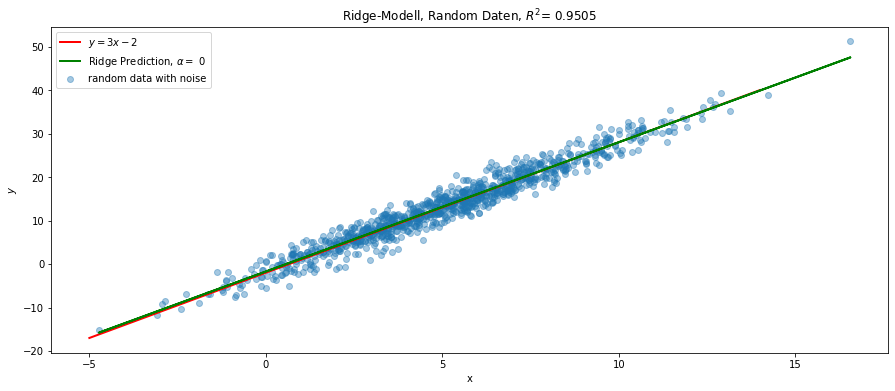

In [8]:
 # Erstelle Ridge Modell mit Inputdaten
ridge_model_gd = RidgeRegression(opt_method='gd', alpha= 0, eta=best_rand_data_lr,
                                maxsteps=5000, eps=0.001).fit(X_rand_data, y_rand_data)
# Erstelle Ridge Modell Prediciton 
y_ridge_pred_gd = ridge_model_gd.predict(X_rand_data)
# R2 score
r2_ridge_gd = ridge_model_gd.score(X_rand_data, y_rand_data)

plot_modell(x_rand_data, y_rand_data, y_ridge_pred_gd, ridge_model_gd.alpha, r2_ridge_gd)

Entwicklung **Kostenfunktion** von **Gradient Descent**  
Hier ist gut ersichtlich wie Gradient Descent das Minimum der Kostenfunkion sucht, indem die Gegenrichtung des Gradienten verwendet wird. Bereits nach 200 Schritten wird das Minimum zimlich gut ermittelt. Falls die Fehlertoleranz vergrössert wird, könnte die Suche noch beschleunigt werden.

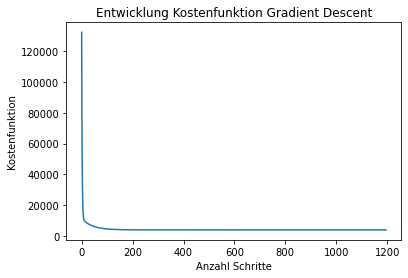

In [9]:
plot_cost(ridge_model_gd.step_total_, ridge_model_gd.costs_)

Testen der **Ridge Regression - Gradient Descent** für verschiedene $\alpha$ Parameter:

found minima beta=[-1.71955996  2.97256481] after 1195 steps


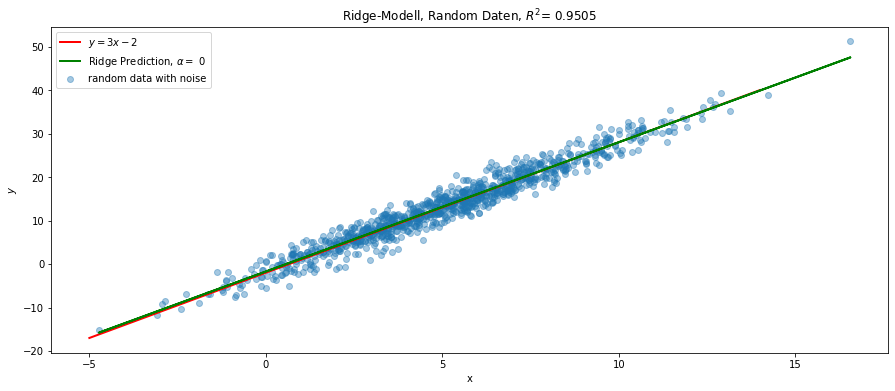

found minima beta=[-1.71781614  2.97222005] after 1194 steps


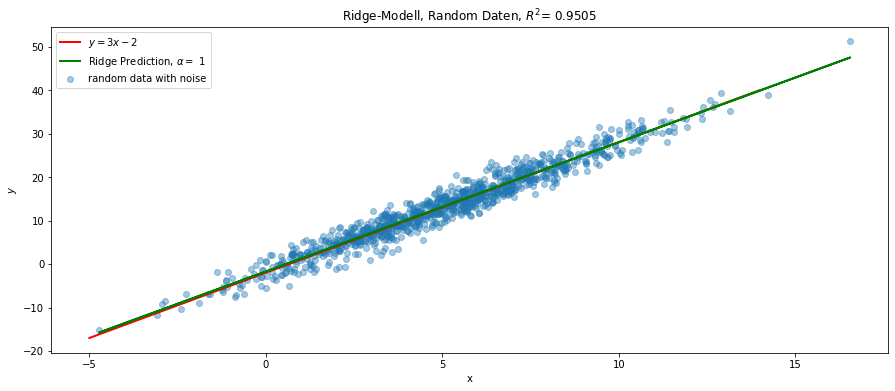

found minima beta=[-1.63286307  2.95542425] after 1188 steps


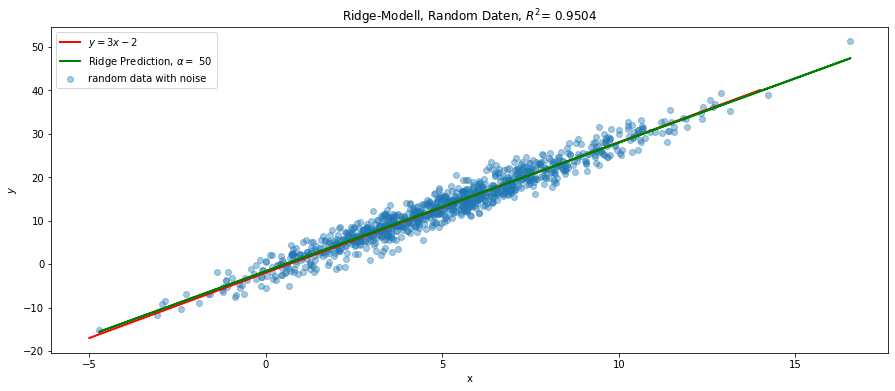

found minima beta=[-1.37866947  2.90516846] after 1170 steps


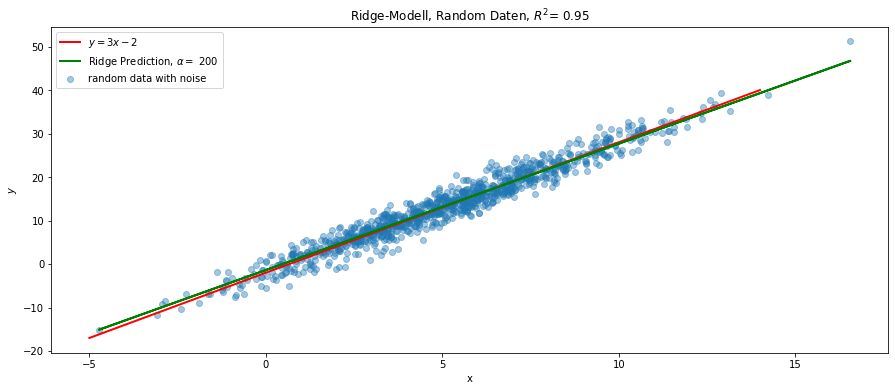

found minima beta=[-0.44283857  2.72014837] after 1102 steps


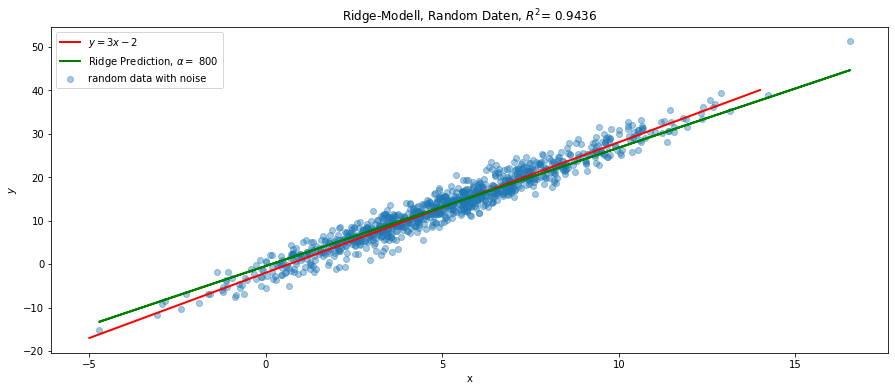

found minima beta=[-0.29833388  2.69157882] after 1091 steps


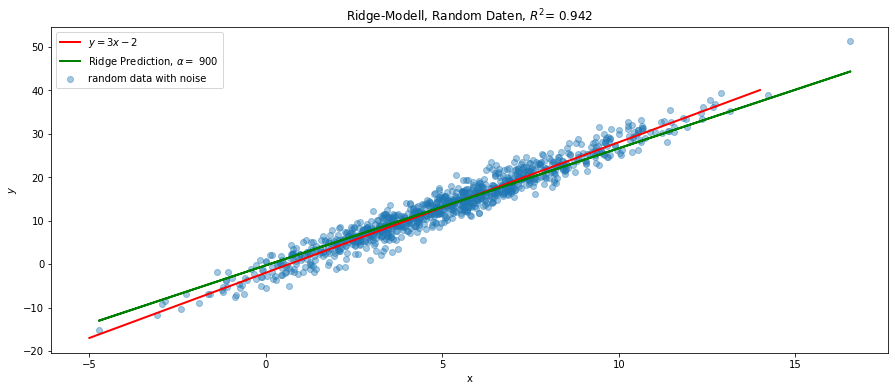

In [10]:
alpha_param = [0, 1, 50, 200, 800, 900]
for i, alpha in enumerate(alpha_param):
    # Erstelle Ridge Modell mit Inputdaten
    ridge_model_gd = RidgeRegression(opt_method='gd', alpha= alpha, eta=best_rand_data_lr,
                                  maxsteps=5000, eps=0.001).fit(X_rand_data, y_rand_data)
    # Erstelle Ridge Modell Prediciton
    y_ridge_pred_gd = ridge_model_gd.predict(X_rand_data)
    # R2 score
    r2_ridge_gd = ridge_model_gd.score(X_rand_data, y_rand_data)

    plot_modell(x_rand_data, y_rand_data, y_ridge_pred_gd, ridge_model_gd.alpha, r2_ridge_gd)

In den oben erstellten Grafiken werden RidgeRegregressions Modelle mit verschiedenen alpha Parameter gezeigt. Der Alpha Wert beieinflusst wie stark die Regularisierung stattfindet, grössere Werte regulieren stärker. 
- bei $\alpha = 0$ wird keine Regularisierung verwendet. (Strafterm wird 0)
- mit zunehmendem $\alpha$ wird durch den Strafterm der RidgeRegression einen Bias hinzugefügt. Damit kann ein Overfitten des Modells auf den Testdaten kontrolliert werden. Der $R^2$ wird zwar schlechter aber das Modell performt besser auf Testdaten oder wenn neue Werte zum Datensatz hinzukommen.
- Welche Werte für $\alpha$ sinnvoll sind, muss ausprobiert werden. Einen zu hohen $\alpha$ Wert, zum Beispiel in der Grafik mit $\alpha = 900$ wird die Regularisierung zu stark angewendet. Bei noch höheren Werten wird nur noch den Intercept ($\beta_0$) verwendet, die restlichen Variablen ausgeschlossen. 

Testen der **RidgRegression - Gradient Funktion** mit festen $\alpha$ , $\beta$ Werten und Random Datensatz.

In [11]:
beta_test = [-2, 3]
alpha = 1
gradient_test = RidgeRegression.gradient(beta_test, X_rand_data, y_rand_data, alpha)
print(f'Gradient für beta:{beta_test} ist {gradient_test}')

Gradient für beta:[-2, 3] ist [-283.3449489966236, -954.117269642092]


Testen der **Ridge Regression - Normalengleichung** für verschiedene $\alpha$ Parameter:

found minima betas=[-1.71956194  2.97256511]


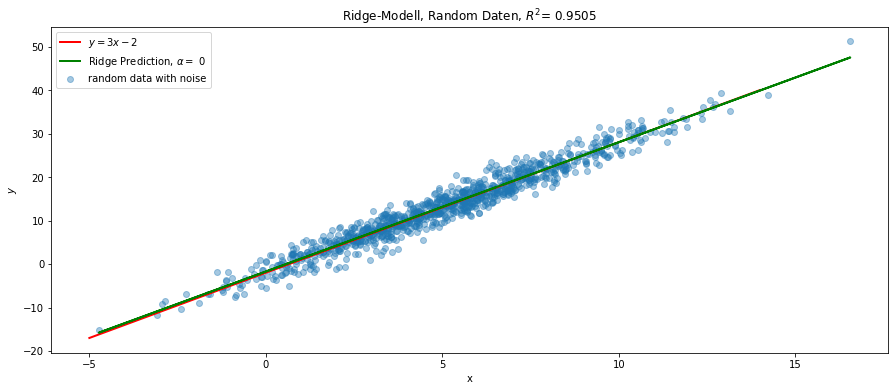

found minima betas=[-1.73063239  2.9741658 ]


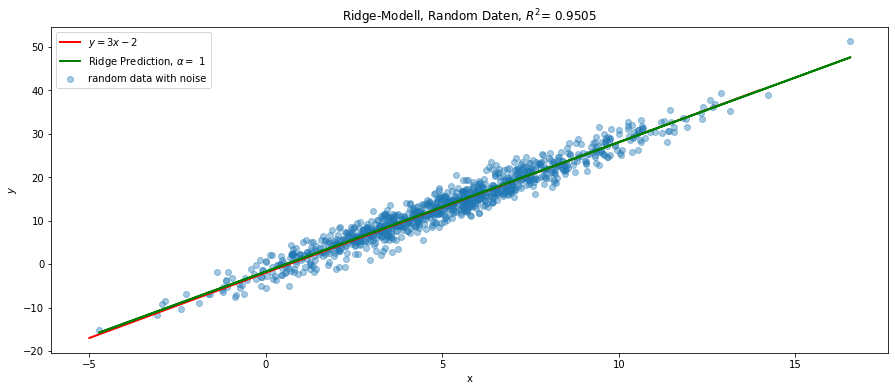

found minima betas=[-2.30405977  3.05789594]


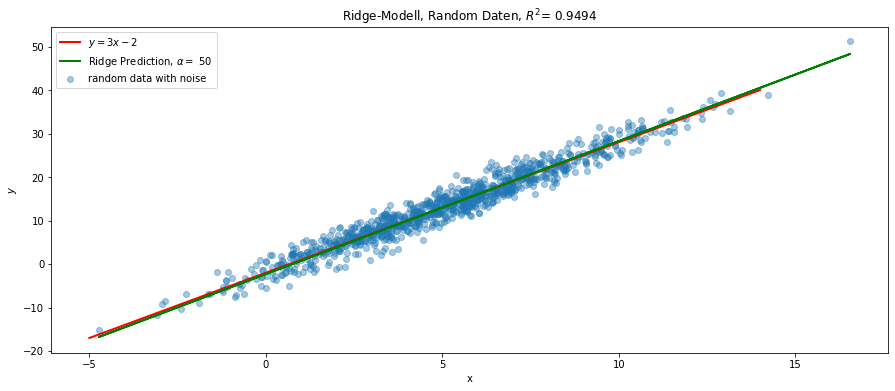

found minima betas=[-3.7025244   3.26770313]


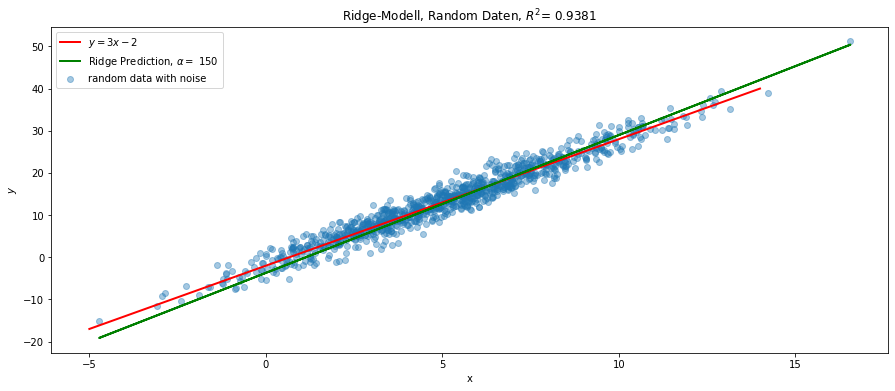

found minima betas=[-4.55122811  3.39804148]


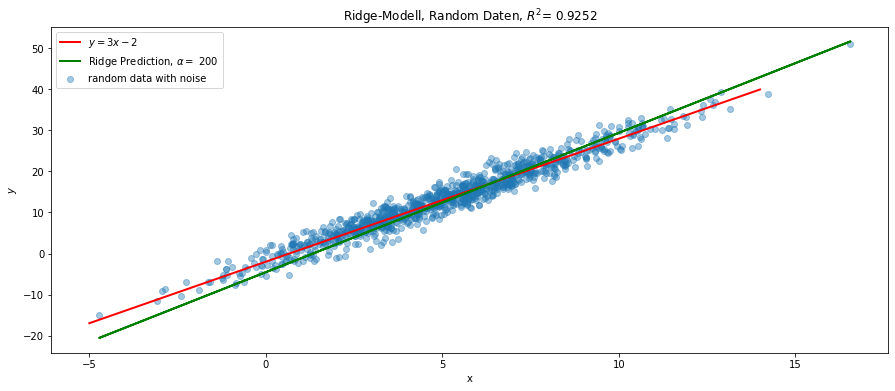

found minima betas=[-14.33342999   4.97465096]


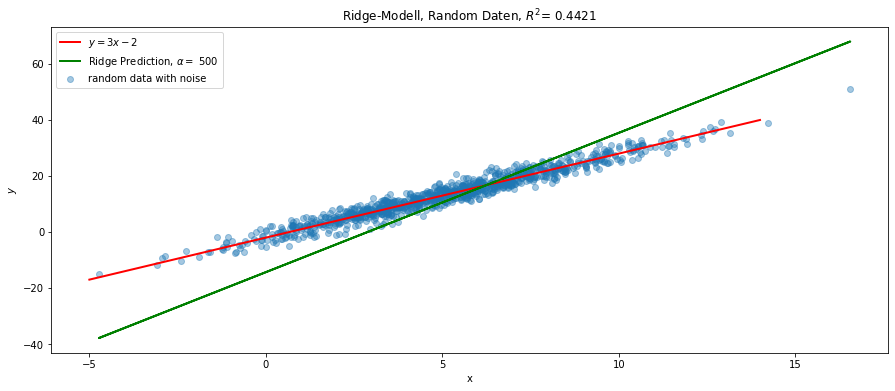

found minima betas=[-114.11916405   21.75399597]


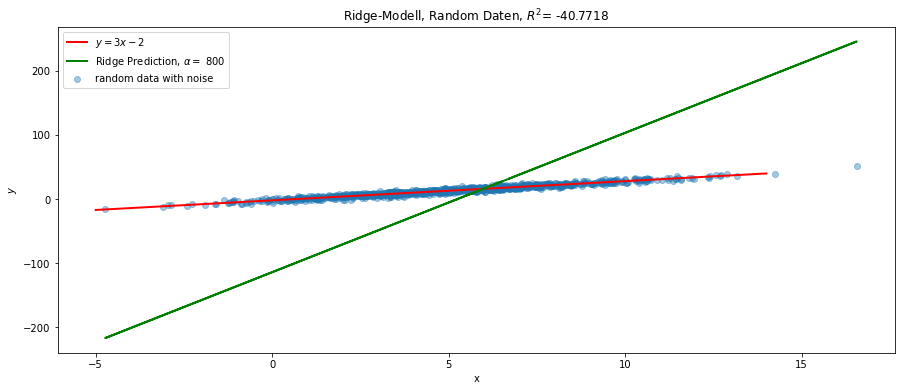

found minima betas=[220.01430176 -34.69264413]


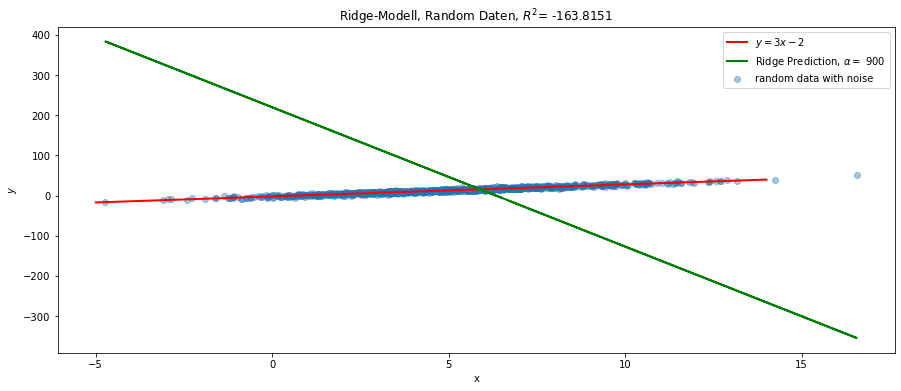

In [12]:
alpha_param = [0, 1, 50, 150, 200, 500, 800, 900]
for alpha in alpha_param:
    # Erstelle Ridge Modell mit Inputdaten
    ridge_model_neq = RidgeRegression(opt_method='neq', alpha= alpha).fit(X_rand_data, y_rand_data)
    # Erstelle Ridge Modell Prediciton
    y_ridge_pred_neq = ridge_model_neq.predict(X_rand_data)
    # R2 score
    r2_ridge_neq = ridge_model_neq.score(X_rand_data, y_rand_data)

    plot_modell(x_rand_data, y_rand_data, y_ridge_pred_neq, ridge_model_neq.alpha, r2_ridge_neq)

Die oben erstellten Grafiken verwenden für die Modelle die Normalengleichung. Dieselben $\alpha$-Parameter wie bei Gradient Descent sollen die stattfindende Regularisierung zeigen. Im Gegensatz zu Gradient Descent verwendet die Normalengleichung keine Suche sondern findet mit Linearer Algebra direkt die $\beta$-Parameter.  

Testen der **KostenFunktion**, RidgeRegression.costfunction():

found minima betas=[-1.72509418  2.97336494]


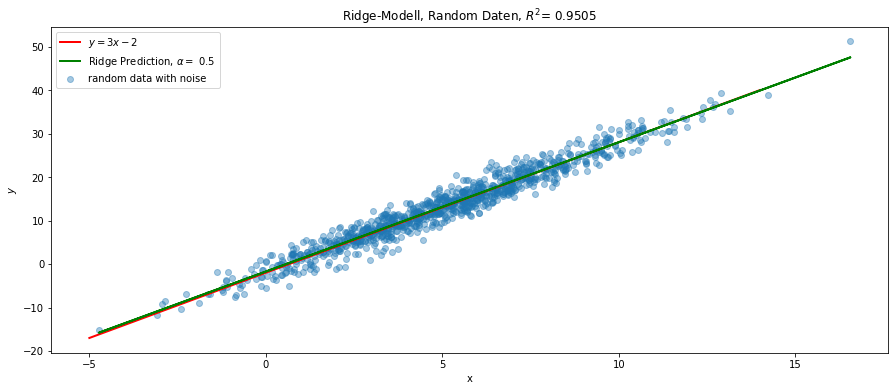

In [13]:
# Erstelle Ridge Modell mit Inputdaten
ridge_model_neq = RidgeRegression(opt_method='neq', alpha= 0.5).fit(X_rand_data, y_rand_data)
# Erstelle Ridge Modell Prediciton
y_ridge_pred_neq = ridge_model_neq.predict(X_rand_data)
# R2 score
r2_ridge_neq = ridge_model_neq.score(X_rand_data, y_rand_data)

plot_modell(x_rand_data, y_rand_data, y_ridge_pred_neq, ridge_model_neq.alpha, r2_ridge_neq)

best beta Modell parameter gefunden: [-1.72509418  2.97336494]
Wert Kostenfunktion Modell:       3973.62055


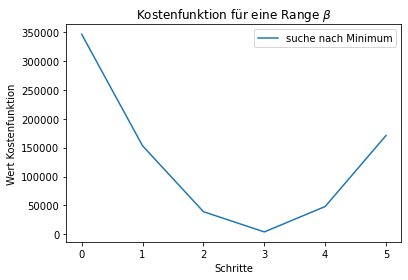

In [14]:
# get optimal betas
print(f'best beta Modell parameter gefunden: {ridge_model_neq.beta_}')
print(f'Wert Kostenfunktion Modell: \
      {RidgeRegression.costfunction(ridge_model_neq.beta_, X_rand_data, y_rand_data, ridge_model_neq.alpha)}')

# create range around optimal beta parameter
beta_0_range = np.arange(-3, 0, 0.5) 
beta_1_range = np.arange(0, 6, 1) 

assert(len(beta_0_range) == len(beta_1_range))

# calc each beta paramter
cost_func = []
for b0, b1 in zip(beta_0_range, beta_1_range):
    #print(b0, b1)
    cost = RidgeRegression.costfunction([b0, b1], X_rand_data, y_rand_data, ridge_model.alpha)
    cost_func.append(cost)
cost_func

# plot costfunction with different beta values
plt.plot(np.arange(0,6,1), cost_func, label=f'suche nach Minimum')
plt.title('Kostenfunktion für eine Range $\\beta$')
plt.xlabel('Schritte')
plt.ylabel('Wert Kostenfunktion')
plt.legend()
plt.show()

Eine 3D Grafik würde das Suchen des globalen Minimums besser zeigen, die 2D Grafik soll die Idee hinter der argmin(costfunction) zeigen, nämlich den kleinsten Wert der Kostenfunktion zu finden und die besten $\beta$ Modellkoeffizienten ausgeben. Es wurde eine Range von verschiedenen Beta Parameter erstellt und diese der Kostenfunktion übergeben. 

Zeigen das **Gradient Descent** und **Normalengleichung** zum gleichen Resultat kommen.

In [15]:
# Modelle mit Gradient Descent und Normalengleichung erstellen
alpha = 1
ridge_model_gd = RidgeRegression(opt_method='gd', alpha= alpha, eta=best_rand_data_lr,
                                  maxsteps=5000, eps=0.000001).fit(X_rand_data, y_rand_data)
ridge_model_neq = RidgeRegression(opt_method='neq', alpha= alpha).fit(X_rand_data, y_rand_data)

found minima beta=[-1.71781814  2.97222035] after 1751 steps
found minima betas=[-1.73063239  2.9741658 ]


In [16]:
# zeigen das die beta-parameter die selben sind
try:
    np.testing.assert_array_almost_equal(ridge_model_gd.beta_, ridge_model_neq.beta_, decimal=2, verbose=False)
except:
    print('Assert Error')

Die gefundenen Parameter $\beta_0$ und $\beta_1$ sind gleich. Die Abweichungen könnte optimiert werden:
- indem bei Gradient Descent die Lernrate verbessert wird (exakteres Minimum suchen) 
- das Runden auf mehr Dezimalstellen erlaubt wird

### Aufgabe 4 (7 Punkte)

Schreibe nun eine Funktion, die einen Contour Plot der Kostenfunktion erstellt (siehe dazu gml Aufgabenblatt 1 im Trainingcenter). Zeichne den Pfad von Gradient Descent durch die Koeffizientenebene ein (dazu musst du die obige Klasse modifizieren) und untersuche und vergleiche den Plot für

- unterschiedliche Regularisierungsstärken, inkl. ohne Regularisierung.
- mit und ohne Standardisierung der Input-Daten.

Diskutiere deine Einsichten.

In [17]:
import pandas as pd

In [18]:
# Contour Plot der Kostenfunktion aus Aufgabenblatt 1
def create_contour_plot(X, y, alpha, r2, steps_beta, betalims=(-10., 10.), resolution=.2, ax=None):

    # Schritte für beta als panda Dataframe um Betas zu verwenden
    steps_beta_taken = pd.DataFrame(steps_beta)
    
    # create meshgrid
    xx1, xx2 = np.meshgrid(np.arange(betalims[0], betalims[1], resolution),
                         np.arange(betalims[0], betalims[1], resolution))

    Z = []
    for b0, b1 in zip(xx1.ravel(), xx2.ravel()):
        Z.append(RidgeRegression.costfunction(np.array([b0, b1]), X, y, alpha))

    Z = np.array(Z).reshape(xx1.shape)

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
    else:
        fig = None

    ax.contour(xx1, xx2, Z, levels=np.linspace(Z.min(), Z.max(), 20))
    ax.plot(steps_beta_taken[0], steps_beta_taken[1])
    ax.set_title(f'Gradient Descent alpha={alpha}, R2={r2.round(3)}')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_xlabel(r'$\beta_0$')
    
    if fig is not None:
        return fig, ax

**Zeichne den Pfad von Gradient Descent** mit unterschiedlichen Regularisierungen (ohne Standardisierung).

alpha = 0
found minima beta=[-1.71955996  2.97256481] after 1195 steps
alpha = 1
found minima beta=[-1.71781614  2.97222005] after 1194 steps
alpha = 400
found minima beta=[-1.05289418  2.84076048] after 1147 steps
alpha = 800
found minima beta=[-0.44283857  2.72014837] after 1102 steps
alpha = 1000
found minima beta=[-0.15683311  2.66360316] after 1081 steps
alpha = 5000
found minima beta=[3.79951264 1.88140678] after 2753 steps


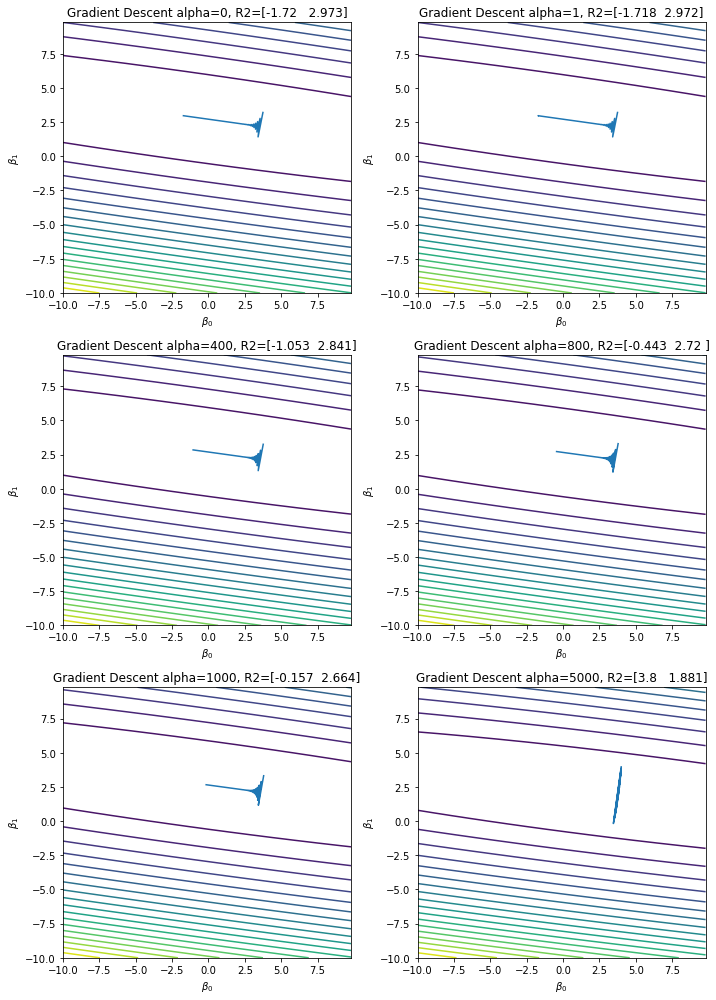

In [19]:
fig, ax = plt.subplots(3,2, figsize=(10,14))
ax = ax.flatten()

alpha_param = [0, 1, 400, 800, 1000, 5000]
for ax, alpha in zip(ax, alpha_param):
    #create Modell
    print(f'alpha = {alpha}')
    ridge_model_gd = RidgeRegression(opt_method='gd', alpha= alpha, eta=best_rand_data_lr,
                                  maxsteps=5000, eps=0.001).fit(X_rand_data, y_rand_data)    
    
    # Zeichne Gradient Descent Weg
    create_contour_plot(X_rand_data, y_rand_data, alpha, ridge_model_gd.beta_, 
                                        ridge_model_gd.steps_beta_, betalims=(-10., 10.), resolution=.2, ax=ax)
fig.tight_layout()
plt.show()

Die oben erstellten Contour Plots zeigen den Pfad den Gradient Descent nimmt für verschieden Regularisierungen ($\alpha$). Gradient Descent wird so lange ausgeführt bis der Gradienten Vektor fast verschwindet. Hier wenn die Euklidischen Norm des Gradienten < eps ist. Der Start Wert für die Beta Parameter wurde bezüglich bessere Ansicht auf $\beta_0, \beta_1 = 4$ festgelegt.
Aus den Grafiken wird ersichtlich dass mit erhöhen der Regularisierung nicht mehr dass exakte Minimum erreicht wird, also dass der Strafterm stärker hinzugefügt wird.

**Zeichne den Pfad von Gradient Descent** mit unterschiedlichen Regularisierungen (mit Standardisierung).

In [20]:
# Original daten (nicht Standardisiert)
X_rand_data

array([[1.        , 6.49014246],
       [1.        , 4.5852071 ],
       [1.        , 6.94306561],
       ...,
       [1.        , 6.92252858],
       [1.        , 3.28646303],
       [1.        , 6.71774834]])

In [21]:
# Standardisierung der Input Daten (als Matrix)
X_rand_data_norm = RidgeRegression.normalize_matrix(X_rand_data)
X_rand_data_norm

array([[ 1.        ,  0.48775857],
       [ 1.        , -0.1610219 ],
       [ 1.        ,  0.64201457],
       ...,
       [ 1.        ,  0.63502009],
       [ 1.        , -0.60334651],
       [ 1.        ,  0.5652763 ]])

In [22]:
# Standardisierung der Daten (als Vektor)
x_rand_data_norm = RidgeRegression.normalize_vector(x_rand_data)
y_rand_data_norm = RidgeRegression.normalize_vector(y_rand_data)

In [23]:
if True:
    lr_rate = np.round(np.arange(0.00005,0.00008, 0.000005), 6)
    nsteps = []
    for lr in lr_rate:
        print(lr)
        ridge_model = RidgeRegression(opt_method='gd', alpha= 0, eta=lr, 
                                      maxsteps=5000, eps=0.001).fit(X_rand_data_norm, y_rand_data_norm)
        nsteps.append(ridge_model.step_total_)
#best_rand_data_lr = 0.000025

5e-05
found minima beta=[3.59257998e-07 9.74923864e-01] after 154 steps
5.5e-05
found minima beta=[3.69207841e-07 9.74923872e-01] after 139 steps
6e-05
found minima beta=[3.55925706e-07 9.74923862e-01] after 127 steps
6.5e-05
found minima beta=[3.85738773e-07 9.74923884e-01] after 116 steps
7e-05
found minima beta=[3.92097682e-07 9.74923889e-01] after 107 steps
7.5e-05
found minima beta=[3.49906945e-07 9.74923857e-01] after 100 steps


alpha = 0
found minima beta=[3.59257998e-07 9.74923864e-01] after 154 steps
alpha = 1
found minima beta=[3.99175553e-07 9.73949940e-01] after 153 steps
alpha = 400
found minima beta=[4.92809324e-07 6.96373995e-01] after 151 steps
alpha = 800
found minima beta=[4.92809324e-07 5.41624218e-01] after 151 steps
alpha = 1000
found minima beta=[4.92809324e-07 4.87461796e-01] after 151 steps
alpha = 10000
found minima beta=[4.92809324e-07 8.86294175e-02] after 151 steps


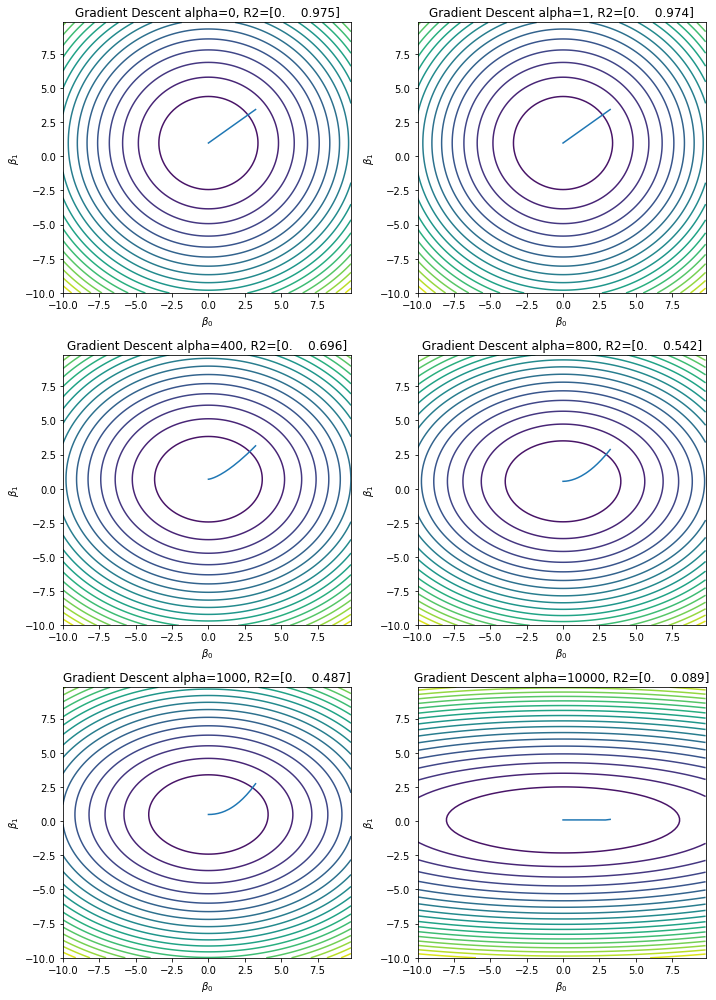

In [24]:
fig, ax = plt.subplots(3,2, figsize=(10,14))
ax = ax.flatten()

# Pfad Gradient Descent mit Contourplot zu verschiedenen alpha parameter
alpha_param = [0, 1, 400, 800, 1000, 10000]
for ax, alpha in zip(ax, alpha_param):
    #create Modell
    print(f'alpha = {alpha}')
    ridge_model_gd = RidgeRegression(opt_method='gd', alpha= alpha, eta=0.00005,
                                  maxsteps=5000, eps=0.001).fit(X_rand_data_norm, y_rand_data_norm)
    
    # Zeichne Gradient Descent Weg
    create_contour_plot(X_rand_data_norm, y_rand_data_norm, alpha, ridge_model_gd.beta_,
                                        ridge_model_gd.steps_beta_, betalims=(-10., 10.), resolution=.2, ax=ax)
    
fig.tight_layout()
plt.show()

Durch die Standardisierung der Daten werden alle Variablen zum besseren vergleich aufbearbeitet, sind also um Null verteilt und 99.9% der Daten befinden sich im $3\sigma$ Bereich. Bei standardisierten Daten $x$ verläuft der Pfad des Gradient Descent direkt zum Minimum (kein hin und herspringende Suche). Das wird wohl noch eindeutiger wenn mehrere, nicht standardisierte, Inputdaten zur Anwendung kommen. Mit zwei beta Parameter wird dies im runden Kontourplot schön ersichtlich.    
Somit zeigt sich dass standardisieren der Daten für Regression Modelle, zu besseren und schnelleren Resultaten (Anzahl Schritte sind einiges tiefer) führen. Auch zeigen sich höhere $\alpha$-Werte als stabiler, ohne Standardisierung divergierte die Suche ab $\alpha=5000$. Bei den standardisierten Inputdaten, sieht man dass bei $\alpha=10000$ das Modell eine horizontale Gerade annährt. Der Ridge Strafterm ist alos so hoch dass nur noch $\beta_0$ zugelassen werden. Die übrigen $\beta$ werden praktisch 0 (Aber nie gleich 0, dafür gibt es Lasso Regression)  

Etwas speziell ist das die optimalen Parameter $\alpha, eta, eps$ gefunden werden müssen und wohl bei jedem Modell (mit anderen Daten) wieder anders aussehen. Auf jedenfall lohnt es sich diese Parameter genauer anzuschauen und verschiedene Möglichkeiten auszuprobieren (Genauigkeit des Modells und Rechenaufwand). Schwierig wird es wohl im Mehrdimensionalen Bereich (d>3), da dort keine Grafischen Hilsfmittel zur Verfügung stehen.

Testen des **Einflusses der Standardisierung** auf den **$R^2$** score

In [25]:
alpha_param = [0, 1, 50, 150, 200, 500, 800, 900]
for alpha in alpha_param:
    print(f'alpha={alpha}')
    # Erstelle Ridge Modell mit Inputdaten
    ridge_model_gd = RidgeRegression(opt_method='gd', alpha= alpha, eta=0.000025, 
                                      maxsteps=5000, eps=0.001, print_info=False).fit(X_rand_data, y_rand_data)
    # Erstelle Ridge Modell Prediciton
    y_ridge_pred_gd = ridge_model_gd.predict(X_rand_data)
    # R2 score
    r2_ridge_gd = ridge_model_gd.score(X_rand_data, y_rand_data)
    print(f'R2 ohne Standardisierung = {r2_ridge_gd}')
    
     # Erstelle Ridge Modell mit Inputdaten
    ridge_model_gd_norm = RidgeRegression(opt_method='gd', alpha= alpha, eta=0.00005, 
                                      maxsteps=5000, eps=0.001, print_info=False).fit(X_rand_data_norm, y_rand_data_norm)
    # Erstelle Ridge Modell Prediciton
    y_ridge_pred_gd_norm = ridge_model_gd_norm.predict(X_rand_data_norm)
    # R2 score
    r2_ridge_gd_norm = ridge_model_gd_norm.score(X_rand_data_norm, y_rand_data_norm)
    print(f'R2 mit Standardisierung = {r2_ridge_gd_norm}')

alpha=0
R2 ohne Standardisierung = 0.9505
R2 mit Standardisierung = 0.9505
alpha=1
R2 ohne Standardisierung = 0.9505
R2 mit Standardisierung = 0.9505
alpha=50
R2 ohne Standardisierung = 0.9504
R2 mit Standardisierung = 0.9483
alpha=150
R2 ohne Standardisierung = 0.9502
R2 mit Standardisierung = 0.9343
alpha=200
R2 ohne Standardisierung = 0.95
R2 mit Standardisierung = 0.9241
alpha=500
R2 ohne Standardisierung = 0.9476
R2 mit Standardisierung = 0.8449
alpha=800
R2 ohne Standardisierung = 0.9436
R2 mit Standardisierung = 0.7627
alpha=900
R2 ohne Standardisierung = 0.942
R2 mit Standardisierung = 0.7372


In Fall von den erstellten Random Daten ist keine Verbesserung des $R^2$ durch die Standardisierung feststellbar.
Es scheint aber dass das Modell durch die Standardisierung nun empfindlicher auf höhere alpha Werte reagiert.

### Aufgabe 5 (4 Punkte)

Lade den Datensatz `data/moto.csv` und verschaffe dir einen Überblick durch explorative Datenanalyse. Unser Ziel wird es sein, den Preis (`price`) der Motorräder vorherzusagen unter Verwendung der übrigen Attribute. Teile deine Überlegungen zu diesem Problem.  

Unterteile den Datensatz nun noch in Trainings- und Testdaten (80:20) für die weiteren Aufgaben.

YOUR ANSWER HERE

In [26]:
import pandas as pd

In [27]:
# YOUR CODE HERE
df_moto = pd.read_csv('../data/moto.csv')
df_moto

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
0,Strasse,schwarz,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki
1,Strasse,rot,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki
2,Strasse,grün,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki
3,Strasse,schwarz,Occasion,948.0,Benzin Bleifrei,True,125.0,11990,285.0,0,10.0,Kawasaki
4,Strasse,grau,Occasion,649.0,Benzin Bleifrei,True,48.0,10500,262.0,12,10.0,Kawasaki
...,...,...,...,...,...,...,...,...,...,...,...,...
5614,Strasse,weiss,Occasion,997.0,Benzin,False,188.0,5590,283.0,137,24762.0,Kawasaki
5615,Strasse,schwarz,Occasion,997.0,Benzin,False,175.0,5400,271.0,161,31000.0,Kawasaki
5616,Strasse,schwarz matt.,Occasion,997.0,Benzin,False,188.0,5990,283.0,112,17400.0,Kawasaki
5617,Strasse,schwarz,Neu,998.0,Benzin,True,200.0,19990,281.0,0,10.0,Kawasaki


In [28]:
df_moto.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5619 entries, 0 to 5618
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   body_shape        5619 non-null   object 
 1   colour            5605 non-null   object 
 2   condition         5619 non-null   object 
 3   displacement      5619 non-null   float64
 4   fuel              5612 non-null   object 
 5   has_mfk           5619 non-null   bool   
 6   performance       5619 non-null   float64
 7   price             5619 non-null   int64  
 8   curb_weight       5619 non-null   float64
 9   registration_age  5619 non-null   int64  
 10  mileage           5619 non-null   float64
 11  brand             5619 non-null   object 
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 488.5+ KB


**Ueberblick verschaffen:**
1. Datentypen untersuchen
1. fehlende Werte und Outliers suchen
1. Fehler in den Daten Suchen und ggf. korrigieren
1. Kolinearität zwischen Attributen suchen
1. Variablen Transformationen untersuchen

**1.** Datentypen untersuchen
- Attr:body_shape hat nur eine gewisse Menge an Ausprägungen. Kategorisch, keine Ordnung
- Attr:colour hat nur eine gewisse Menge an Ausprägungen. Kategorisch, keine Ordnung
- Attr:condition hat nur eine gewisse Menge an Ausprägungen. Kategorisch, keine Ordnung
- Attr:fuel hat nur eine gewisse Menge an Ausprägungen. Kategorisch, keine Ordnung
- Attr:brand hat nur eine gewisse Menge an Ausprägungen. Kategorisch, keine Ordnung

In [29]:
df_moto_clean = df_moto.copy()

attributs_cat = ['body_shape', 'colour', 'condition', 'fuel', 'brand']
for attr in attributs_cat:
    df_moto_clean[attr] = df_moto_clean[attr].astype("category")
df_moto_clean.dtypes

body_shape          category
colour              category
condition           category
displacement         float64
fuel                category
has_mfk                 bool
performance          float64
price                  int64
curb_weight          float64
registration_age       int64
mileage              float64
brand               category
dtype: object

**2.** fehlende Werte und Outliers suchen

In [30]:
# suche fehlende Werte
df_moto_clean.isna().sum()

body_shape           0
colour              14
condition            0
displacement         0
fuel                 7
has_mfk              0
performance          0
price                0
curb_weight          0
registration_age     0
mileage              0
brand                0
dtype: int64

Insgesamt gibt es 14 missings in colour und 7 in fuel. Es könnte untersucht werden wiso es zu fehlenden Werten kommt. Da es jedoch sehr wenige Werte sind werden diese entfernt.

In [31]:
df_moto_clean = df_moto_clean.dropna()

Untersuchen von Verteilungen und Outliers

C:\Users\manue\AppData\Local\Temp/ipykernel_14620/3769419918.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(x, rotation=90)


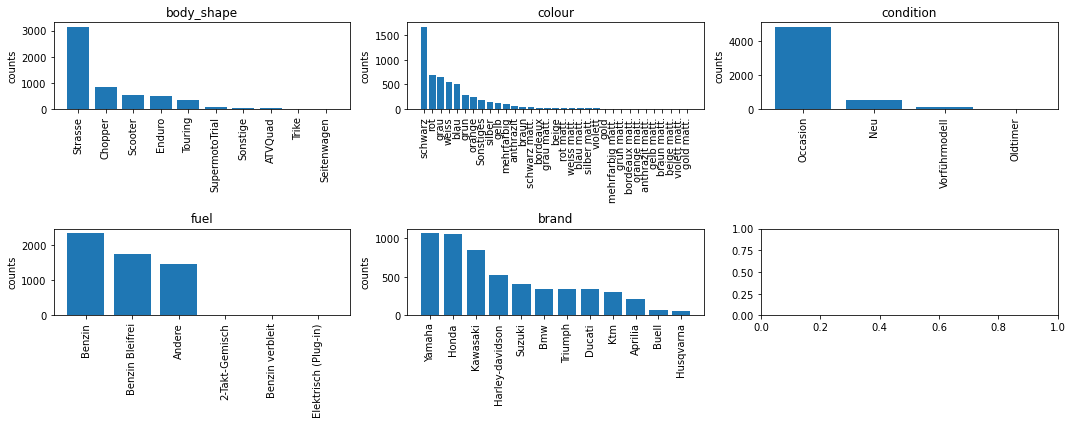

In [32]:
# Verteilung Kategorische Attribute absolute
fig, ax = plt.subplots(2,3, figsize=(15,6))
ax = ax.flatten()
attributs_cat = ['body_shape', 'colour', 'condition', 'fuel', 'brand']

for i, attr in enumerate(attributs_cat):
    x = df_moto_clean[attr].value_counts().index.to_list()
    y = df_moto_clean[attr].value_counts()
    ax[i].bar(x, y)
    ax[i].set_title(attr)
    ax[i].set_xticklabels(x, rotation=90)
    ax[i].set_ylabel('counts')
fig.tight_layout()
plt.show()

C:\Users\manue\AppData\Local\Temp/ipykernel_14620/2450746642.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(x, rotation=90)


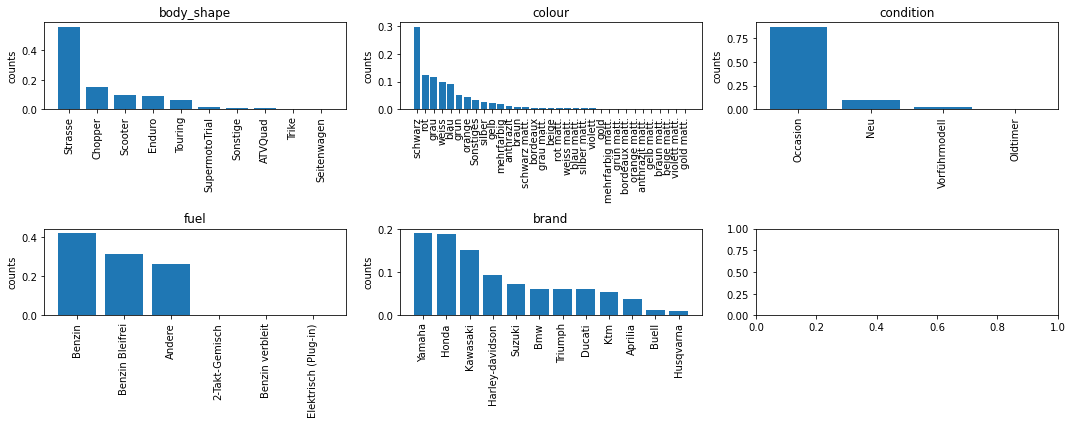

In [33]:
# Verteilung Kategorische Attribute percent
fig, ax = plt.subplots(2,3, figsize=(15,6))
ax = ax.flatten()
attributs_cat = ['body_shape', 'colour', 'condition', 'fuel', 'brand']

for i, attr in enumerate(attributs_cat):
    x = df_moto_clean[attr].value_counts().index.to_list()
    y = df_moto_clean[attr].value_counts() / len(df_moto_clean[attr])
    ax[i].bar(x, y)
    ax[i].set_title(attr)
    ax[i].set_xticklabels(x, rotation=90)
    ax[i].set_ylabel('counts')
fig.tight_layout()
plt.show()

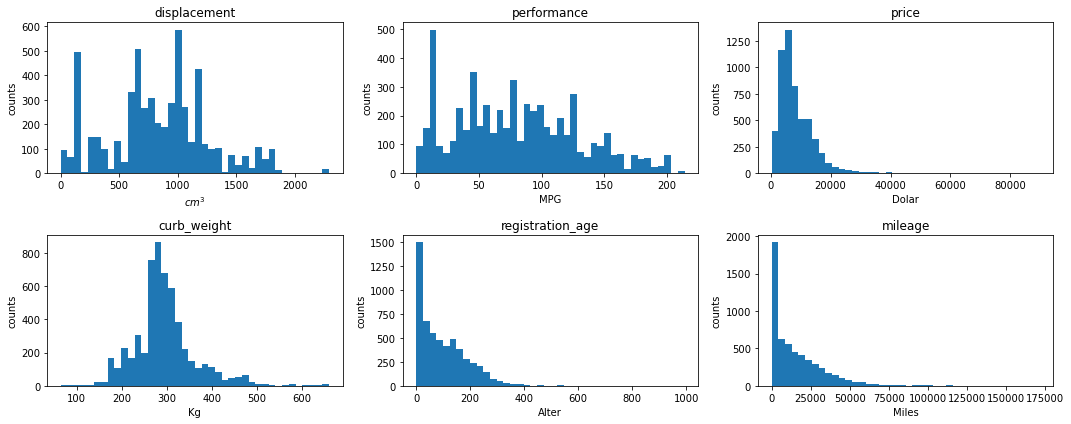

In [34]:
# Verteilung Numerischen Attributen
fig, ax = plt.subplots(2,3, figsize=(15,6))
ax = ax.flatten()
attribut_num = ['displacement', 'performance', 'price', 'curb_weight', 'registration_age', 'mileage']
x_units = [r'$cm^3$', 'MPG', 'Dolar', 'Kg', 'Alter', 'Miles']

for i, attr in enumerate(attribut_num):
    ax[i].hist(df_moto_clean[[attr]], bins=40)
    ax[i].set_title(attr)
    ax[i].set_xlabel(x_units[i])
    ax[i].set_ylabel('counts')
fig.tight_layout()
plt.show()

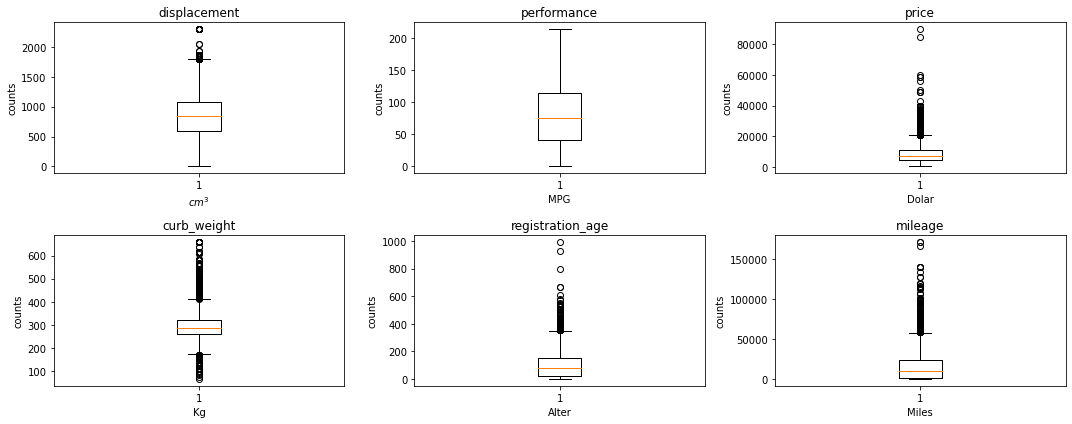

In [35]:
fig, ax = plt.subplots(2,3, figsize=(15,6))
ax = ax.flatten()

for i, attr in enumerate(attribut_num):
    ax[i].boxplot(df_moto_clean[[attr]])
    ax[i].set_title(attr)
    ax[i].set_xlabel(x_units[i])
    ax[i].set_ylabel('counts')
fig.tight_layout()
plt.show()

Fazit aus den oben erstellten Grafiken:
- In den Kategorische Attributen kommen einige Werte sehr oft vor und andere sehr selten. Zum Beispiel ist Condition zu +75% Occasionen, Farbe schwarz ist sehr dominierend mit 30%, die Fareb gold matt praktisch +0%, Oldtimer auch sehr tief).
- Achutng bei der Modellentwicklung mit sehr wenigen Daten in den Kategorischen Daten.
- In den Numerischen Werten sieht man ein logarithmisches Verhalten in Preis, Alter und Miles.
- In den Boxplots zeigt sich das Log-Verhalten erneut. 

**3.** Fehler in den Daten suchen
- Aus den Verteilungen der numerischen Daten sollten die 0-Werte oder nahe 0 Werte genauer untersucht werden. Zum Beispiel price, performance, displacement gleich oder nahe an 0.
- Bis auf das Attribut:Age sind die maximalen ranges der numersichen Variablen vernümpftige Werte, sollten aber bei der Modellentwicklung evtl erneut untersucht werden 

In [36]:
df_moto_clean[(df_moto_clean['displacement'] < 40)]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
1022,Scooter,orange,Occasion,1.0,Benzin verbleit,True,14.96,2800,179.0,46,29200.0,Ktm
3484,Enduro,orange,Occasion,0.0,Elektrisch (Plug-in),True,15.00,7800,179.0,35,1700.0,Ktm
3560,Enduro,orange,Occasion,0.0,Elektrisch (Plug-in),False,15.00,6900,179.0,58,887.0,Ktm
3561,Enduro,orange,Neu,0.0,Elektrisch (Plug-in),False,15.00,12290,179.0,0,1.0,Ktm
3562,Enduro,orange,Occasion,0.0,Elektrisch (Plug-in),True,15.00,8500,179.0,22,300.0,Ktm
3563,Enduro,orange,Neu,0.0,Elektrisch (Plug-in),True,15.00,12990,179.0,0,1.0,Ktm
4096,Enduro,blau,Vorführmodell,0.0,Benzin,True,0.00,14490,340.0,34,100.0,Yamaha
4581,Strasse,schwarz,Neu,15.0,Benzin,False,0.00,4480,182.0,0,1.0,Honda


In [37]:
df_moto_clean[(df_moto_clean['displacement'] > 1800)]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
340,Chopper,Sonstiges,Occasion,2053.0,Andere,False,93.0,6000,565.0,141,29000.0,Kawasaki
366,Chopper,Sonstiges,Occasion,2053.0,Andere,False,103.0,7200,556.0,187,60000.0,Kawasaki
769,Chopper,Sonstiges,Occasion,2293.0,Andere,False,141.0,7700,585.0,177,13300.0,Triumph
772,Chopper,rot,Occasion,2294.0,Andere,False,140.0,9990,425.0,153,20236.0,Triumph
774,Chopper,rot,Occasion,2294.0,Andere,False,140.0,34900,425.0,128,38500.0,Triumph
...,...,...,...,...,...,...,...,...,...,...,...,...
5224,Touring,schwarz,Occasion,1867.0,Benzin,True,102.0,28500,488.0,29,19300.0,Harley-davidson
5285,Sonstige,schwarz,Occasion,1867.0,Benzin,True,94.0,35500,392.0,12,10.0,Harley-davidson
5286,Chopper,schwarz,Neu,1867.0,Benzin,True,94.0,42980,392.0,0,10.0,Harley-davidson
5300,Chopper,schwarz,Neu,1867.0,Benzin,True,91.0,28400,378.0,0,1.0,Harley-davidson


Werte unterhalb 40ccm sind eindeutig Datenfehler und werden entfernt, Hubraum grösser 1800 ccm werden als Outlier gesehen und entfernt

In [38]:
# Werte unterhalb 40ccm sind eindeutig Datenfehler und werden entfernt
print(df_moto_clean.shape)
df_moto_clean = df_moto_clean[~((df_moto_clean['displacement'] < 40) | (df_moto_clean['displacement'] > 1800))]
df_moto_clean.shape

(5598, 12)


(5474, 12)

In [39]:
df_moto_clean[df_moto_clean['price'] < 500]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
1913,Scooter,blau,Occasion,125.0,Andere,False,11.0,420,215.0,237,21440.0,Yamaha
2494,Scooter,grau,Occasion,125.0,Benzin Bleifrei,False,14.0,495,224.0,246,20554.0,Honda
2510,Scooter,schwarz,Occasion,49.0,Benzin Bleifrei,False,3.0,279,152.0,274,22200.0,Honda


In [40]:
df_moto_clean[df_moto_clean['price'] > 30_000]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
323,Chopper,grau,Occasion,903.0,Benzin Bleifrei,False,50.00,39500,353.0,130,1500.0,Kawasaki
414,Strasse,schwarz,Occasion,998.0,Benzin Bleifrei,True,200.00,31500,313.0,12,10.0,Kawasaki
2469,Touring,Sonstiges,Occasion,1500.0,Andere,False,82.96,30700,475.0,222,80000.0,Honda
2642,Strasse,schwarz,Oldtimer,1340.0,Benzin Bleifrei,False,40.00,56000,260.0,994,100.0,Harley-davidson
2669,Chopper,Sonstiges,Occasion,1449.0,Andere,False,70.00,32000,526.0,177,15000.0,Harley-davidson
2735,Chopper,anthrazit,Occasion,1689.0,Andere,True,74.00,33900,399.0,48,8042.0,Harley-davidson
2778,Touring,weiss,Occasion,1745.0,Andere,True,89.00,48900,463.0,21,30.0,Harley-davidson
2780,Touring,schwarz,Occasion,1745.0,Andere,True,90.00,33000,463.0,22,5283.0,Harley-davidson
2793,Touring,weiss,Occasion,1745.0,Andere,True,90.00,32900,451.0,26,14000.0,Harley-davidson
2808,Touring,Sonstiges,Occasion,1745.0,Andere,True,91.00,33000,487.0,43,4000.0,Harley-davidson


keine Preise mit 0 festgestellt. tiefste Preise scheinen erklärbar in Anbetracht der mileage. Preise über 30'000 scheinen z.B für Harley-davidson erklärbar. Werden dennoch als Outlier gesehen und entfernt.

In [41]:
print(df_moto_clean.shape)
df_moto_clean = df_moto_clean[~(df_moto_clean['price'] > 30_000)]
df_moto_clean.shape

(5474, 12)


(5440, 12)

In [42]:
print(f'max registartion_age = {df_moto_clean["registration_age"].max()}')
df_moto_clean[df_moto_clean['registration_age'] > 100]

max registartion_age = 930


,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
6,Strasse,rot,Occasion,750.0,Benzin Bleifrei,False,76.0,3900,220.0,340,48000.0,Kawasaki
7,Strasse,grau,Occasion,498.0,Benzin Bleifrei,False,27.0,3600,274.0,257,3500.0,Kawasaki
8,Strasse,Sonstiges,Occasion,499.0,Andere,False,34.0,2750,380.0,245,19390.0,Kawasaki
9,Chopper,grau,Occasion,124.0,Benzin Bleifrei,False,11.0,1900,223.0,245,11597.0,Kawasaki
10,Chopper,rot,Occasion,124.0,Benzin Bleifrei,False,12.0,2800,223.0,245,31200.0,Kawasaki
...,...,...,...,...,...,...,...,...,...,...,...,...
5612,Strasse,schwarz,Occasion,997.0,Benzin,False,175.0,6500,271.0,163,24000.0,Kawasaki
5613,Strasse,grün,Occasion,997.0,Benzin,False,175.0,4600,271.0,165,20730.0,Kawasaki
5614,Strasse,weiss,Occasion,997.0,Benzin,False,188.0,5590,283.0,137,24762.0,Kawasaki
5615,Strasse,schwarz,Occasion,997.0,Benzin,False,175.0,5400,271.0,161,31000.0,Kawasaki


Das Alter des Motorrads wäre ein gutes Attribut für das Modell. Da rund die hälfte älter > 100 ist, liegt die vermutung nahe das es sich hier Monate seit der Registrierung handel. Für eine bessere Übersicht wird das Alter zusätzlich in Jahren berechnet.

In [43]:
# Untersuche 0 Wert
df_moto_clean[(df_moto_clean['registration_age'] == 0) & (df_moto_clean['mileage'] > 100)]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
3303,Strasse,orange,Neu,955.0,Benzin,False,98.0,7000,305.0,0,200.0,Triumph
3427,Strasse,schwarz,Neu,899.0,Benzin,False,55.0,9900,292.0,0,800.0,Triumph
3747,Strasse,weiss matt.,Neu,1037.0,Benzin,True,101.0,13700,303.0,0,150.0,Suzuki
3919,Strasse,blau,Neu,689.0,Benzin,False,75.0,8790,270.0,0,450.0,Yamaha
3946,Strasse,schwarz,Neu,847.0,Benzin,False,115.0,11390,285.0,0,250.0,Yamaha
3989,Trike,blau,Neu,847.0,Benzin,True,11.0,17790,338.0,0,300.0,Yamaha
4359,Strasse,schwarz,Neu,847.0,Benzin,True,115.0,11990,266.0,0,900.0,Yamaha
4368,Strasse,schwarz,Neu,997.0,Benzin,True,160.0,13690,285.0,0,250.0,Yamaha
5153,Strasse,rot,Neu,1198.0,Benzin,True,137.0,16890,286.0,0,120.0,Ducati
5397,Strasse,grau,Neu,649.0,Benzin,True,61.0,8700,300.0,0,900.0,Kawasaki


0 Werte scheinen ok zu sein, da Motorrad als neu verkauft wird.

In [44]:
df_moto_clean['age_year'] = np.round(df_moto_clean['registration_age'] / 12, 0)
df_moto_clean[(df_moto_clean['age_year'] > 40)]

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand,age_year
395,Strasse,braun,Oldtimer,498.0,Benzin Bleifrei,False,60.00,12000,185.0,528,20000.0,Kawasaki,44.0
743,Strasse,Sonstiges,Occasion,125.0,Andere,False,12.00,2760,203.0,535,34800.0,Suzuki,45.0
903,Strasse,rot,Occasion,750.0,Benzin verbleit,False,53.00,9800,200.0,518,17500.0,Triumph,43.0
904,Strasse,blau,Oldtimer,744.0,Benzin Bleifrei,False,42.00,11000,205.0,488,35244.0,Triumph,41.0
1138,Touring,schwarz,Oldtimer,250.0,Benzin verbleit,False,12.00,6900,145.0,798,40100.0,Bmw,66.0
1447,Strasse,schwarz,Oldtimer,250.0,Benzin Bleifrei,False,18.00,7800,160.0,666,2550.0,Bmw,56.0
1448,Strasse,schwarz,Oldtimer,248.0,Benzin verbleit,False,18.00,7800,166.0,666,2500.0,Bmw,56.0
1449,Touring,schwarz,Oldtimer,600.0,Benzin Bleifrei,True,40.00,8900,210.0,547,80100.0,Bmw,46.0
2566,Strasse,mehrfarbig,Occasion,249.0,Benzin Bleifrei,True,26.00,2200,160.0,572,51734.0,Honda,48.0
2567,Strasse,rot,Oldtimer,750.0,Benzin verbleit,True,67.00,12000,240.0,523,46000.0,Honda,44.0


Sechs Motorräder sind älter als 50 Jahre mit max = 83. Für oldtimer scheint das wohl möglich. Zusätzlich soll noch nach mileage gefiltert werden. Alte Motorräder mit wenig Fahrkilometer können vorkommen aber können als Outlier entfernt werden.
Bei der Modellentwicklung schauen obe es sinnvoller ist nach quantilen zu entfernen.

In [45]:
print(df_moto_clean.shape)
df_moto_clean = df_moto_clean[~((df_moto_clean['age_year'] > 30) & (df_moto_clean['mileage'] < 5000))]
df_moto_clean = df_moto_clean[~(df_moto_clean['age_year'] > 50)]
df_moto_clean.shape

(5440, 13)


(5431, 13)

**4.** Koolinearitäten prüfen  
Bei Modellen sollte auf Attribute geachtet werden die nicht unabhängig von einander sind. Hohe $R^2$ Werte weisen auf Kolinearität hin (>0.8).   
*Bemerkung: Die folgende Tabelle mit Pearson Korrelation kann nur Koolinearität finden aber nicht feststellen ob keine vorhanden ist. Um Kolinearität auszuschliessen könnten Modelle mit einzelnen Attributen als Zielvariable benutzt werden.*

In [46]:
attribut_num = ['displacement', 'performance', 'price', 'curb_weight', 'registration_age', 'mileage']
attribut_corr = df_moto_clean[attribut_num].corr()
attribut_corr.style.background_gradient(cmap='coolwarm')

,displacement,performance,price,curb_weight,registration_age,mileage
displacement,1.000000,0.651845,0.611060,0.763405,0.091160,0.225287
performance,0.651845,1.000000,0.459673,0.353235,-0.064143,0.104218
price,0.611060,0.459673,1.000000,0.460519,-0.363545,-0.312476
curb_weight,0.763405,0.353235,0.460519,1.000000,0.072552,0.201968
registration_age,0.091160,-0.064143,-0.363545,0.072552,1.000000,0.683607
mileage,0.225287,0.104218,-0.312476,0.201968,0.683607,1.000000


Attribute wie MPG-Displacment und curb_weigt-displacment zeigen eine hohe Korrelation. $R^2 < 0.8$ aber in der Modellentwicklung testen was passiert, wenn eine der Variablen weggelassen wird.

**5.** Variablen transformationen 
Preis, Alter und Miles zeigen ein logarithmisches Verhalten. Dise könnten Transformiert werden um eine Normal Verteilung zu erhalten. Da Gewicht, Alter, Preis unterschiedlich Gross sind macht ein Standardisierung auch Sinn.

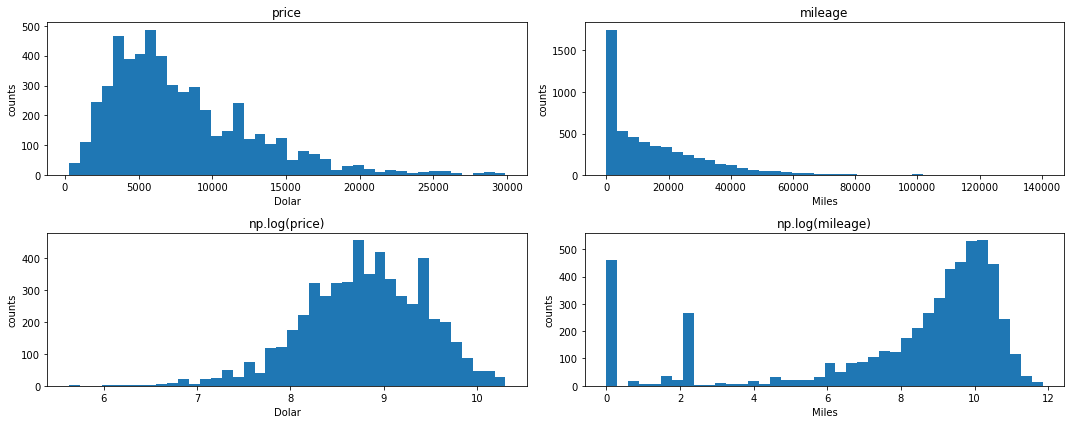

In [47]:
# Zeigen das mit log Transformation Daten normal Verteilt sind (registration_age enthält 0 Werte)
fig, ax = plt.subplots(2,2, figsize=(15,6))
ax = ax.flatten()
attribut_log = ['price', 'mileage'] * 2
x_units_log = ['Dolar', 'Miles'] * 2

for i, attr in enumerate(attribut_log):
    if i <=1:
        ax[i].hist(df_moto_clean[[attr]], bins=40)
        ax[i].set_title(attr)
        ax[i].set_xlabel(x_units_log[i])
        ax[i].set_ylabel('counts')
    else:
        ax[i].hist(np.log(df_moto_clean[[attr]]), bins=40)
        ax[i].set_title(f'np.log({attr})')
        ax[i].set_xlabel(x_units_log[i])
        ax[i].set_ylabel('counts')    
    
fig.tight_layout()
plt.show()

**Unterteile** den Datensatz in Test-Train (80:20)

In [48]:
np.random.seed(42)
# nimm 80% der Daten
mask = np.random.rand(len(df_moto_clean)) < 0.8
df_train = df_moto_clean[mask]
df_test = df_moto_clean[~mask]

print('len(df_moto_clean):',len(df_moto_clean))
print('len(df_train):',len(df_train))
print('len(df_test):',len(df_test))
print(f'ratio train: {len(df_train)/len(df_moto_clean)*100:f}%')
print('sum:',len(df_train) + len(df_test))

len(df_moto_clean): 5431
len(df_train): 4349
len(df_test): 1082
ratio train: 80.077334%
sum: 5431


### Aufgabe 6 (3 Punkte)

Erstelle ein erstes einfaches lineares Modell für `price`, bloss mit der einen Input-Variablen `displacement`.  

Untersuche für die unregularisierte OLS-Lösung die Modell-Annahmen eines linearen Modells. Schau dir dazu *Kapitel 4 - Residuenanalyse* im Skript von Werner Stahel an, wenn du Anleitung möchtest.    

Nimm, falls sinnvoll, Variablen-Transformationen vor, um dein Modell zu verbessern und untersuche den Effekt. Erkläre dein Vorgehen.

In [49]:
# YOUR CODE HERE

In [50]:
# Funktion Plot 2 zum plotten von Modellen
def plot2_modell(x, y, y_predict, beta, alpha, r2, title='Ridge Regression', xlabel='x', ylabel='y'):
    ''' Modell plots
    '''
    # Modell Regressionslinie
    x_line = np.arange(x.min(), x.max(), 1)
    y_line = beta[0] + (beta[1] *x_line )
    
    # Plot data
    plt.figure(figsize=(15,6))
    plt.scatter(x, y, alpha=0.4, label='data')
    # Modell fit
    plt.plot(x_line, y_line, color='red', linewidth=2, label='Regression line')
    #plt.plot(X, y_predict, color='green', linewidth=2, label=f'Ridge Prediction, $\\alpha=$ {alpha}')
    plt.title(f'{title}, $R^2$= {r2}, $alpha$={alpha}')
    plt.xlabel(xlabel), plt.ylabel(ylabel)
    plt.legend()
    plt.show()
    #return p

In [51]:
# Funktion Plot 2 zum plotten von Modellen
def plot3_modell(x, y, y_predict, beta, alpha, r2, ax=None, title='Ridge Regression', xlabel='x', ylabel='y'):
    ''' Modell plots
    '''
    # Modell Regressionslinie
    x_line = np.arange(x.min(), x.max(), 1)
    y_line = beta[0] + (beta[1] *x_line )
    
    # Plot data
    ax.scatter(x, y, alpha=0.4, label='data')
    # Modell fit
    ax.plot(x_line, y_line, color='red', linewidth=2, label='Regression line')
    #plt.plot(X, y_predict, color='green', linewidth=2, label=f'Ridge Prediction, $\\alpha=$ {alpha}')
    ax.set_title(f'{title}, $R^2$= {r2}, $alpha$={alpha}')
    ax.set_xlabel(xlabel), ax.set_ylabel(ylabel)
    return ax

In [52]:
def plot_residuen(x, y, y_predict, xlab='', bins=20):
    fig, ax = plt.subplots(1,2, figsize=(15,6))    
    resid = y - y_predict
    
    # Residiuen Plot
    ax[0].scatter(x, resid, alpha=0.3, label='Residuen')
    ax[0].axhline(0, color='red', label=r'$E(x)=0$', linestyle='-.')
    ax[0].set_xlabel(xlab)
    ax[0].set_ylabel('Residuen')
    ax[0].set_title('Tukey-Anscombe Plot')
    ax[0].legend()    
    
    # Histogram Plot
    resid_mean = resid.mean().round(10)    
    ax[1].hist(resid, bins=bins, label=f'E(x)={resid_mean}')
    ax[1].axvline(resid_mean, color='red', linestyle='-.')
    ax[1].set_xlabel('Residuen')
    ax[1].set_ylabel('count')
    ax[1].set_title('Histogram Residuen')
    ax[1].legend() 
    
    plt.show()

**Modell ohne Variablen-Transformation** ohne Regularisierung

found minima betas=[1980.91376902    7.45828204]


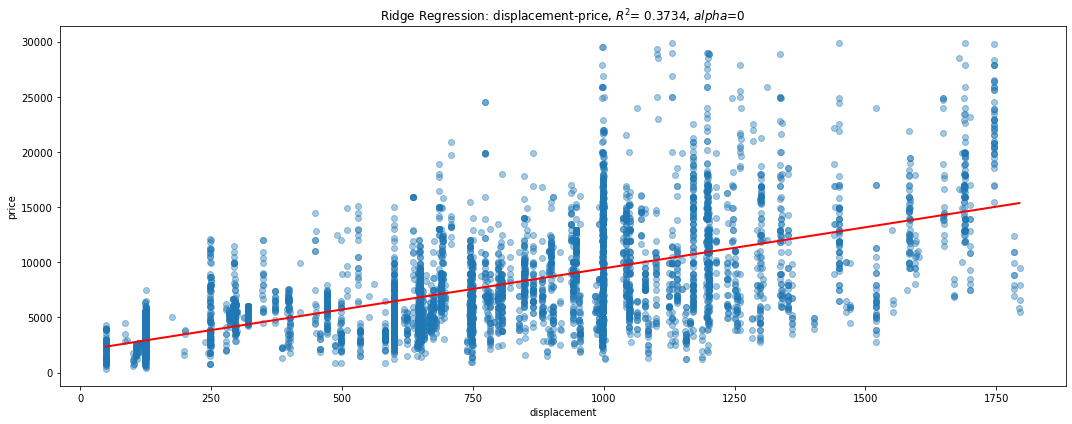

In [53]:
fig, ax = plt.subplots(figsize=(15,6))

# Parameter erstellen
x1 = np.array(df_moto_clean['displacement'])
y1 = np.array(df_moto_clean['price'])
X_data_1 = np.vstack([np.ones(df_moto_clean.shape[0]), x1]).T
    
# Modell erstellen
simp_modell = RidgeRegression(opt_method='neq', alpha= 0, eta=0.00003,
                                  maxsteps=5000, eps=0.001).fit(X_data_1, y1)
r2_simp_modell = simp_modell.score(X_data_1, y1)
y1_pred = simp_modell.predict(X_data_1)
 
# plot modell subplots
plot3_modell(x1, y1, y1_pred, simp_modell.beta_, simp_modell.alpha, r2_simp_modell, ax=ax,
             title=f'Ridge Regression: displacement-price', xlabel='displacement', ylabel='price')
    
fig.tight_layout()
plt.show()

Keines der Modelle erhält einen guten $R^2$ hin. Beim besten Modell Displacement kann eine positive Korrelanz gesehen werden, aber zum Beispiel bei 1000ccm ist die Preisspanne sehr gross.   
Mit der Residuen analyse können weitere Schritte festgelegt werden (Variable Transformation)   
Diese drei Merkmale müssen für ein gutes Modell erfüllt sein:
1. Der Erwartungswert $E(x)$ ist 0,
1. Die Fehler sind normalverteilt,
1. Die Fehler sind unabhängig, also zeigen kein Muster

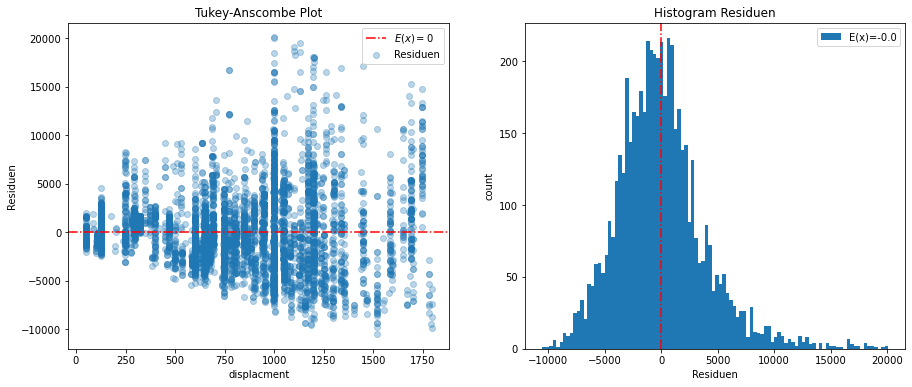

In [54]:
# Residiuen Plot
plot_residuen(x1, y1, y1_pred, 'displacment', bins=100)

Aus der Residuen Analyse sieht man dass (1.) $E(x) = 0$ erfüllt ist, auch scheint (2.) im Histogram die Verteilung normal zu sein. (3) Der Tukey-Anscombe Plot zeigt aber ein Muster der Residuen, das Muster scheint Trichterförmig grösser zu werden. Für das 'korrigieren' einer Trichterfrom kann z.B eine log-Transformation helfen. 

**Modell mit Variablen-Transformation** ohne Regularisierung  
Die Log-Transformation wird angewendet um exponentiell Funktionen (wie zum Beispiel Preis) auf eine Normalverteilte Form zu bringen. Dabei werden höhere Werte stärker Transformiert.

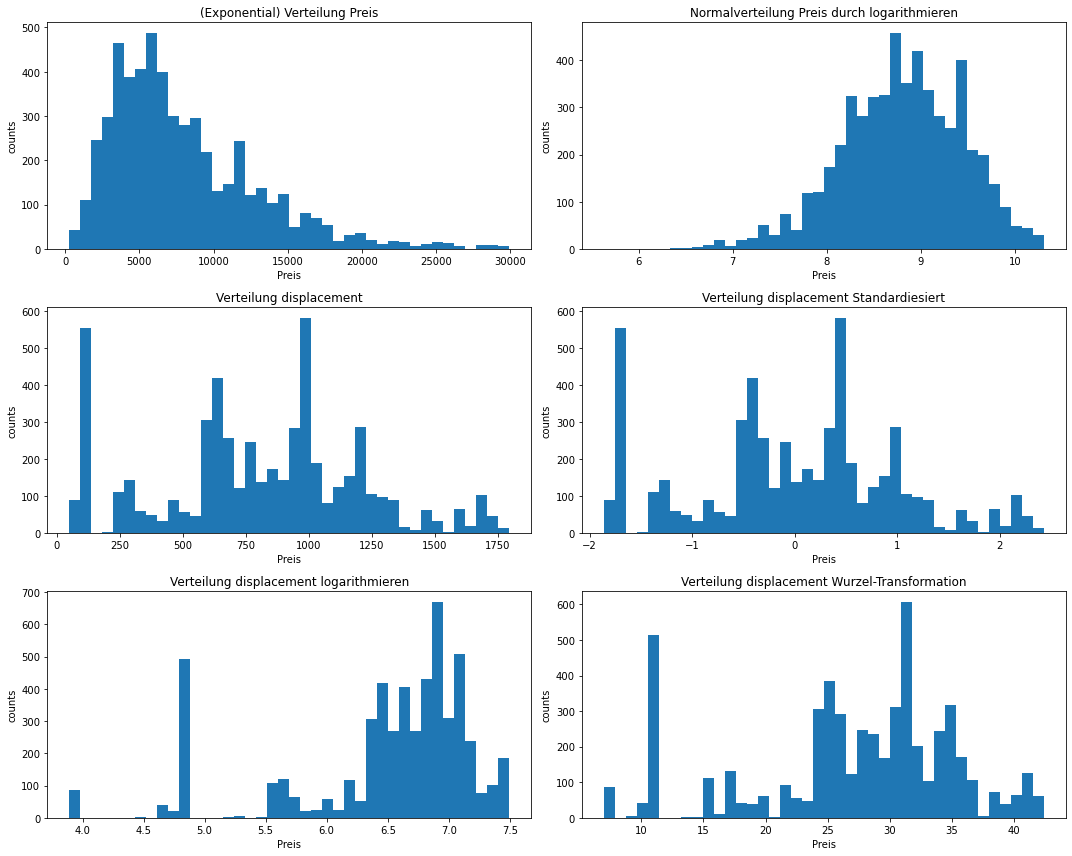

In [55]:
fig, ax = plt.subplots(3,2, figsize=(15,12))
ax[0,0].hist(df_moto_clean['price'], bins=40)
ax[0,0].set_title('(Exponential) Verteilung Preis')
ax[0,0].set_xlabel('Preis')
ax[0,0].set_ylabel('counts')

ax[0,1].hist(np.log(df_moto_clean['price']), bins=40)
ax[0,1].set_title('Normalverteilung Preis durch logarithmieren')
ax[0,1].set_xlabel('Preis')
ax[0,1].set_ylabel('counts')

ax[1,0].hist(df_moto_clean['displacement'], bins=40)
ax[1,0].set_title('Verteilung displacement')
ax[1,0].set_xlabel('Preis')
ax[1,0].set_ylabel('counts')

ax[1,1].hist(RidgeRegression.normalize_vector(df_moto_clean['displacement']), bins=40)
ax[1,1].set_title('Verteilung displacement Standardiesiert')
ax[1,1].set_xlabel('Preis')
ax[1,1].set_ylabel('counts')

ax[2,0].hist(np.log(df_moto_clean['displacement']), bins=40)
ax[2,0].set_title('Verteilung displacement logarithmieren')
ax[2,0].set_xlabel('Preis')
ax[2,0].set_ylabel('counts')

ax[2,1].hist(np.sqrt(df_moto_clean['displacement']), bins=40)
ax[2,1].set_title('Verteilung displacement Wurzel-Transformation')
ax[2,1].set_xlabel('Preis')
ax[2,1].set_ylabel('counts')

plt.tight_layout()
plt.show()

Die obigen Grafiken zeigen dass durch eine Log-Transforamtion des Preises eine Normalverteilung ensteht. Das Attribute Displacement wurde auch mit Transformationen behandelt, führt aber nicht zu einem besseren Ergebnis. Daher wird folgend nur Attribut Preis transformiert.

found minima betas=[7.97329284e+00 1.01844566e-03]


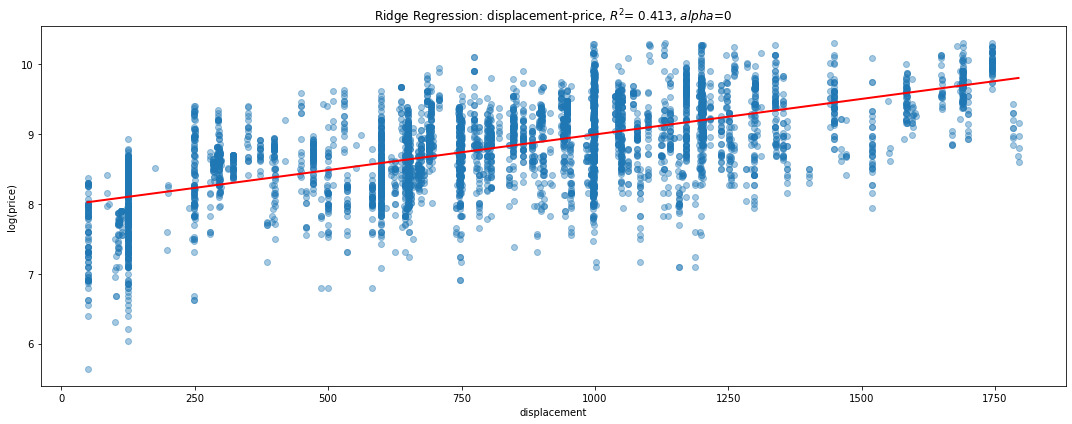

In [56]:
fig, ax = plt.subplots(figsize=(15,6))

# Parameter erstellen
x1 = np.array(df_moto_clean['displacement'])
y1 = np.array(df_moto_clean['price'])
y1_log = np.array(np.log( df_moto_clean['price']) )
X_data_1 = np.vstack([np.ones(df_moto_clean.shape[0]), x1]).T
    
# Modell erstellen
simp_modell_log = RidgeRegression(opt_method='neq', alpha= 0, eta=0.00003,
                                  maxsteps=5000, eps=0.001).fit(X_data_1, y1_log)
r2_simp_modell_log = simp_modell_log.score(X_data_1, y1_log)
y1_pred_log = simp_modell_log.predict(X_data_1)
y1_pred = np.exp( y1_pred_log.round(20))
# plot modell subplots
plot3_modell(x1, y1_log, y1_pred_log, simp_modell_log.beta_, simp_modell_log.alpha, r2_simp_modell_log, ax=ax,
             title=f'Ridge Regression: displacement-price', xlabel='displacement', ylabel='log(price)')
    
fig.tight_layout()
plt.show()

Der $R^2$ Score ist noch nicht überzeugend, aber es werden durch die Transformation von price bereits in allen Modellen bessere $R^2$ Scores erziehlt. Die beiden oberen Grafiken zeigen ausserdem ein positivie Korrelation und die unteren eine negative Korrelation. 
Anhand der gegeben Attribute ist es wohl auch schwierig ein Modell mit nur einem Attribut zu erstellen das den Preis Vorhersagt.   
Die Residuen für displacment und log(price) sehen wie folgt aus:

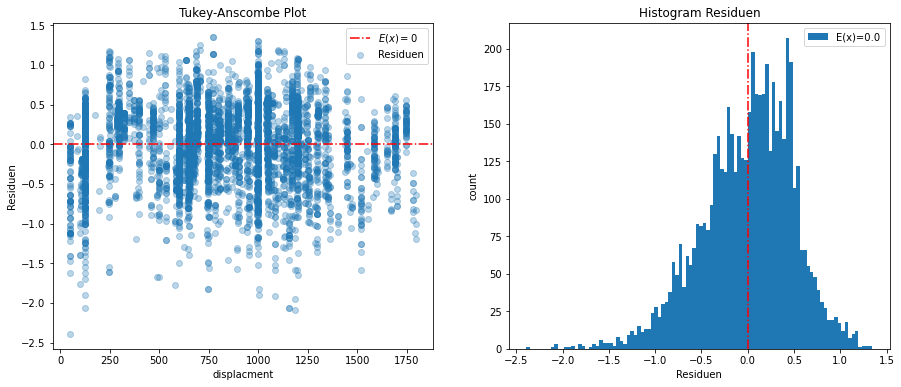

In [57]:
# Residiuen Plot
plot_residuen(x1, y1_log, y1_pred_log, 'displacment', bins=100)

Die Log-Transformation hat die Trichterform der Residuen (links) klar verbessert. Das Trichtermuster ist nicht mehr vorhanden. Durch die Transformation sind die Residuen im Histogramm aber nicht mehr so genau normalverteilt. Es kann argumentiert werden dass im Tukey-Anscombe Plot (links) die Fehler noch nicht gut genug angesprochen werden. Also die Variable Displacement den Preis nicht genug gut vorhersagen kann.  
Auf jedenfall führt das trainieren von Modell mit transformierten Attributen (zu einer Normalverteilung) zu besseren Resultaten. Dies kann auch im leicht höheren $R^2$ des Modells gesehen werden. 

YOUR ANSWER HERE

### Aufgabe 7 (4 Punkte)

Entwickle nun dein bestes Ridge-Regression-Modell im Sinne von $R^2$ auf dem Trainingsdatensatz. Du darfst durch Feature-Transformation beliebige weitere Attribute hinzufügen. Gebe $R^2$ und MAE auf dem Testdatensatz an.

Zur Optimierung der Hyperparameter kannst du scikit-learn-Funktionalität verwenden.

In [58]:
# YOUR CODE HERE
def create_neq_modell(X, y, alpha=0, print_info=False):
    # create Modell
    ridge_model = RidgeRegression(opt_method='neq', alpha= alpha, print_info=print_info).fit(X, y)
    # create prediction
    y_pred = ridge_model.predict(X)
    
    return ridge_model, y_pred

In [59]:
def create_gd_modell(X, y, eta, maxsteps, eps, alpha=0, print_info=False):
     # create Modell
    ridge_model = RidgeRegression(opt_method='gd', alpha= alpha, eta=eta, 
                                      maxsteps=maxsteps, eps=eps, print_info=print_info).fit(X, y)
    # create prediction
    y_pred = ridge_model.predict(X)
    
    return ridge_model, y_pred

**Modell 1**  
Mit nummerischen Werten

Festlegen der **Modell Attribute** und **standardisieren** der Daten

In [60]:
modell_attr = ['displacement', 'performance', 'curb_weight', 'registration_age', 'mileage']

In [61]:
# Trainingsdaten
X1_train = np.array(df_train[modell_attr]).T
X1_train = np.vstack([np.ones(len(df_train)), X1_train]).T
# Standardisieren der Daten
X1_train_norm = RidgeRegression.normalize_matrix(X1_train)

In [62]:
# Testdaten
X1_test = np.array(df_test[modell_attr]).T
X1_test = np.vstack([np.ones(len(df_test)), X1_test]).T
# Standardisieren der Daten
X1_test_norm = RidgeRegression.normalize_matrix(X1_test)

In [63]:
# Trainingsdaten
y1_train = np.array(df_train['price'])
y1_train_log = np.log(y1_train)
# Testdaten
y1_test = np.array(df_test['price'])
y1_test_log = np.log(y1_test)

**Ridge Regression** Modell 1 erstellen

In [64]:
# train modell mit trainingsdaten
modell1, y1_train_pred = create_neq_modell(X1_train_norm, y1_train_log, alpha=0, print_info=False)
# prediction zurück transformieren
y1_train_pred = np.exp(y1_train_pred)
print('Scores Trainingsdaten:')
model_ridge1_r2_train,_ = RidgeRegression.get_scores(y1_train, y1_train_pred, print_info=True)

# teste Modell mit testdaten
y1_pred_test = modell1.predict(X1_test_norm)
# prediction zurück transformieren
y1_pred_test = np.exp(y1_pred_test)
print('Scores Trainingsdaten:')
model_ridge1_r2_test,_ = RidgeRegression.get_scores(y1_test, y1_pred_test, print_info=True)

Scores Trainingsdaten:

Modell score R^2 =  0.6382
Modell score MAE =  1916.2582
Scores Trainingsdaten:

Modell score R^2 =  0.6092
Modell score MAE =  1892.9941


In [65]:
df_moto_clean

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand,age_year
0,Strasse,schwarz,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki,0.0
1,Strasse,rot,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki,0.0
2,Strasse,grün,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki,0.0
3,Strasse,schwarz,Occasion,948.0,Benzin Bleifrei,True,125.0,11990,285.0,0,10.0,Kawasaki,0.0
4,Strasse,grau,Occasion,649.0,Benzin Bleifrei,True,48.0,10500,262.0,12,10.0,Kawasaki,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5614,Strasse,weiss,Occasion,997.0,Benzin,False,188.0,5590,283.0,137,24762.0,Kawasaki,11.0
5615,Strasse,schwarz,Occasion,997.0,Benzin,False,175.0,5400,271.0,161,31000.0,Kawasaki,13.0
5616,Strasse,schwarz matt.,Occasion,997.0,Benzin,False,188.0,5990,283.0,112,17400.0,Kawasaki,9.0
5617,Strasse,schwarz,Neu,998.0,Benzin,True,200.0,19990,281.0,0,10.0,Kawasaki,0.0


**Modell 2**   
inklusive kategorische Attribute als Dummy Variable beigefügt.

In [66]:
import pandas as pd
modell_attr = ['displacement', 'performance', 'curb_weight', 'registration_age', 'mileage']

In [67]:
# Trainingsdaten
X2_train = np.array(df_train[modell_attr]).T
X2_train = np.vstack([np.ones(len(df_train)), X2_train]).T
# Standardisieren der Daten
X2_train_norm = RidgeRegression.normalize_matrix(X2_train)

# Kategorische Attribut hinzufügen
condition_train = np.array(pd.get_dummies(df_train['condition']))
X2_train_norm = np.hstack((X2_train_norm, condition_train))
pd.DataFrame(X2_train_norm)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.345863,0.911548,-0.099272,-1.119933,-0.887156,1.0,0.0,0.0,0.0
1,1.0,0.345863,0.911548,-0.099272,-1.119933,-0.887156,1.0,0.0,0.0,0.0
2,1.0,0.348329,0.911548,-0.099272,-1.119933,-0.886649,0.0,1.0,0.0,0.0
3,1.0,-0.388882,-0.648940,-0.463032,-0.984239,-0.886649,0.0,1.0,0.0,0.0
4,1.0,0.345863,0.911548,-0.099272,-1.119933,-0.887156,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4344,1.0,0.469142,1.924852,-0.320691,0.745864,0.282413,0.0,1.0,0.0,0.0
4345,1.0,0.469142,1.924852,-0.320691,0.700632,0.861865,0.0,1.0,0.0,0.0
4346,1.0,0.469142,2.188311,-0.130904,0.146547,0.094528,0.0,1.0,0.0,0.0
4347,1.0,0.471608,2.431503,-0.162535,-1.119933,-0.886649,1.0,0.0,0.0,0.0


In [68]:
# Testdaten
X2_test = np.array(df_test[modell_attr]).T
X2_test = np.vstack([np.ones(len(df_test)), X2_test]).T
# Standardisieren der Daten
X2_test_norm = RidgeRegression.normalize_matrix(X2_test)

# Kategorische Attribut hinzufügen
condition_test = np.array(pd.get_dummies(df_test['condition']))
X2_test_norm = np.hstack((X2_test_norm, condition_test))
#X2_test_norm

In [69]:
# Trainingsdaten
y2_train = np.array(df_train['price'])
y2_train_log = np.log(y2_train)
# Testdaten
y2_test = np.array(df_test['price'])
y2_test_log = np.log(y2_test)

**Ridge Regression** Modell 2 erstellen

In [70]:
# train modell mit trainingsdaten
modell2, y2_train_pred = create_neq_modell(X2_train_norm, y2_train_log, alpha=0, print_info=True)
print('Scores Trainingsdaten:')
_,_ = RidgeRegression.get_scores(y2_train_log, y2_train_pred, print_info=True)

# teste Modell mit testdaten
y2_pred_test = modell2.predict(X2_test_norm)
print('Scores Trainingsdaten:')
_,_ = RidgeRegression.get_scores(y2_test_log, y2_pred_test, print_info=True)

found minima betas=[0.00000000e+00 6.43842366e-01 5.30737503e-01 1.67784689e-01
 1.16706873e+00 1.74610574e-01 1.28000000e+02 1.28000000e+02
 2.56000000e+02 1.28000000e+02]
Scores Trainingsdaten:

Modell score R^2 =  -34368.864
Modell score MAE =  119.4975
Scores Trainingsdaten:

Modell score R^2 =  -34828.6844
Modell score MAE =  119.6897


Das Modell mit Kategorischen Dummy Variablen, errechnet ein Minimum. Diese ist aber offenbar nicht korrekt, wenn man die Scores betrachtet werden. Es wird daher mit Modell 1 geabeitet.

### Aufgabe 8 (4 Punkte)

Erstelle einen Plot bei welchem du auf der x-Achse die Regularisierungsstärke $\alpha$ und auf der y-Achse $R^2$ für Trainings- und Testdaten (zwei Kurven) zeichnest. Diskutiere den Plot hinsichtlich Bias-Variance Trade-Off und der Verallgemeinerungsfähigkeit des Modells.  

Was ziehst du daraus für Schlüsse für weitere Modellierungsschritte?

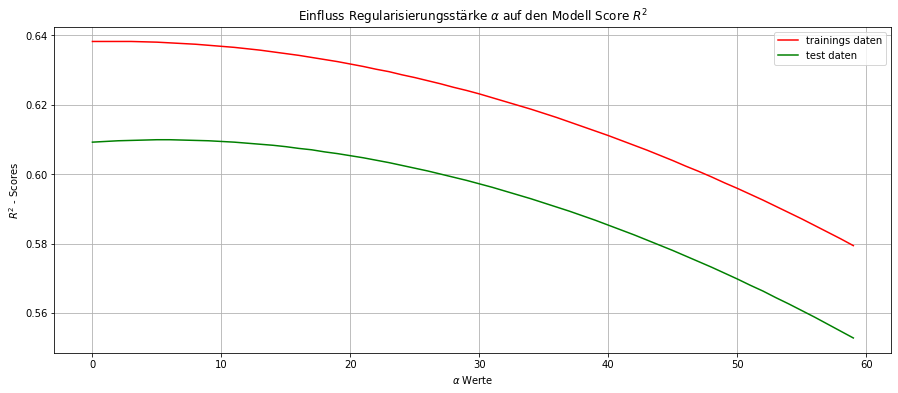

In [71]:
# YOUR CODE HERE
alpha_param = np.arange(0,60,1)
r2_scores_train = []
r2_scores_test = []

for alpha in alpha_param:
    # train modell mit trainingsdaten
    modell1, y1_train_pred_log = create_neq_modell(X1_train_norm, y1_train_log, alpha=alpha, print_info=False)
    # prediction zurück transformieren
    y1_train_pred = np.exp(y1_train_pred_log)
    #print('Scores Trainingsdaten:')    
    r2_train, mae = RidgeRegression.get_scores(y1_train, y1_train_pred, print_info=False)
    r2_scores_train.append(r2_train)

    # teste Modell mit testdaten
    y1_pred_test_log = modell1.predict(X1_test_norm)
    # prediction zurück transformieren
    y1_pred_test = np.exp(y1_pred_test_log)
    #print('Scores Trainingsdaten:')    
    r2_test, mea = RidgeRegression.get_scores(y1_test, y1_pred_test, print_info=False)
    r2_scores_test.append(r2_test)
    
plt.figure(figsize=(15,6))
plt.plot(alpha_param, r2_scores_train, color='red', label='trainings daten')
plt.plot(alpha_param, r2_scores_test, color='green', label='test daten')
plt.title(r'Einfluss Regularisierungsstärke $\alpha$ auf den Modell Score $R^2$')
plt.xlabel(r'$\alpha$ Werte')
plt.ylabel(r'$R^2$ - Scores')
plt.legend()
plt.grid()
plt.show()

Der Bias-Varianze Trad-Off beschreibt die Problematik von Under- und Overfitten des Modells auf die Testdaten. Bei einem hohen Bias ist das Modell zu wenig komplex und kann die Struktur der Daten nicht abbilden/verstehen. Dies führt zu schlechter Modellperformance. Bei einer hohen Varianz fügt sich das Modell (fast) exakt den Datenpunkten an. Auch dieses Modell kann die Testdaten schlecht abbilden, was wieder zu einer schlechten Performance führt. Das Ziel von Modellen sollte also der Mittelweg sein, genug komplex um die Datenstruktur zu verstehen aber nicht zu komplex um die Daten perfekt abzubilden. 

Die Idee Hinter der Regularisierung ist die Varianz, die entsteht durch das Trainieren auf den Traingsdaten, abzuschwächen und einen Bias beizufügen. Ein Overfitten auf den Trainingsdaten, führt zu schlechten Performance auf den Testdaten. Wird das Modell mit weiteren neuen Datenpunkten verwendet, kann sich die Performance weiter verschlechtern. Hier gilt es $\alpha$-Parameter zu finden die die exakte Menge an Bias mitbringen.

Im obige Plot wird ersichtlich dass das hinzufügen eines Bias durch die Regularisierung funktioniert, ersichtlich in der Verschlechterung des $R^2$-Scores mit zunehmenden alphas. Auch ist ersichtlich dass der $R^2$ der Testdaten kurz steigt ($\alpha=[0,10]$, kurzzeitig konstant bleibt und später sinkt als der $R^2$ der Trainingsdaten.  

Um den nichtlinearen Zusammenhang zu zeigen eine zusätzliche Grafik die die Differenz der beiden $R^2$ zeigt. 

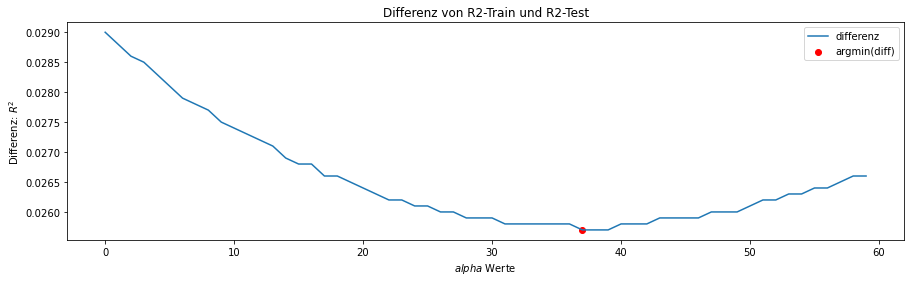

In [72]:
# Differenz von R2-Train und R2-Test
r2_diff = np.array(r2_scores_train) - np.array(r2_scores_test)
r2_min = np.argmin(r2_diff)
# plot 
plt.figure(figsize=(15,4))
plt.plot(alpha_param, r2_diff, label='differenz')
plt.scatter(r2_min, r2_diff[r2_min], color='red', label='argmin(diff)')
plt.title('Differenz von R2-Train und R2-Test')
plt.xlabel(r'$alpha$ Werte')
plt.ylabel(r'Differenz: $R^2$')
plt.legend()
plt.show()

**Rückschlüsse**:  


Die erste Grafik zeigt somit, dass das hinzufügen eines Bias, einen Effekt auf die Performance des Modells auf die Testdaten hat. Durch eine passende Regularisierung ensteht ein robusteres Modell das auch besser mit weiteren neuen Daten besser umgehen kann (Verallgemeinerung des Modells).

### Aufgabe 9 (10 Punkte)

Was ist das beste Modell für die Output-Variable `price` im Sinne von $R^2$, das du ohne Einschränkungen finden kannst?

Vergleiche dazu mindestens drei weitere Ansätze miteinander.

Wie verändert sich die Situation wenn du für den *Mean Absolute Error* (MAE) optimierst?

Hierzu kannst du scikit-learn Funktionalität verwenden.

In [73]:
from sklearn.preprocessing import normalize
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import mean_absolute_error as MAE

**Auswahl Modelle:** 
1. Lasso Regression  
Interessant um die Performance mit der eigeenen erstellen RidgeRegressions Klasse zu vergleichen.
1. Decision Tree (Regression)  
Entscheidungsbäume lassen sich, neben Klassifikationen auch auf Regressionsprobleme anwenden.
1. Random Forrest (Regression)  
Interessant um die Entscheidung vieler Entscheidungsbäume zu betrachten.

**Auswahl der Attribute** für die Modelle

In [74]:
df_moto_clean

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand,age_year
0,Strasse,schwarz,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki,0.0
1,Strasse,rot,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki,0.0
2,Strasse,grün,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki,0.0
3,Strasse,schwarz,Occasion,948.0,Benzin Bleifrei,True,125.0,11990,285.0,0,10.0,Kawasaki,0.0
4,Strasse,grau,Occasion,649.0,Benzin Bleifrei,True,48.0,10500,262.0,12,10.0,Kawasaki,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5614,Strasse,weiss,Occasion,997.0,Benzin,False,188.0,5590,283.0,137,24762.0,Kawasaki,11.0
5615,Strasse,schwarz,Occasion,997.0,Benzin,False,175.0,5400,271.0,161,31000.0,Kawasaki,13.0
5616,Strasse,schwarz matt.,Occasion,997.0,Benzin,False,188.0,5990,283.0,112,17400.0,Kawasaki,9.0
5617,Strasse,schwarz,Neu,998.0,Benzin,True,200.0,19990,281.0,0,10.0,Kawasaki,0.0


In [75]:
# Erstelle Dataframe für Modelle
attr_modell_numersich = ['displacement', 'performance', 'curb_weight', 'registration_age', 'mileage']
attr_modell = ['displacement', 'has_mfk', 'performance', 'curb_weight', 'registration_age', 'mileage', 'brand']

In [76]:
# Traingsdaten
X_train_num = df_train[attr_modell_numersich].copy()
X_train_num_norm = normalize(X_train_num)
X_train = pd.get_dummies(df_train[attr_modell].copy())
X_train_norm = normalize(X_train)

y_train = df_train['price'].copy()
y_train_log = np.log(y_train)

# Testdaten
X_test_num = df_test[attr_modell_numersich].copy()
X_test_num_norm = df_test[attr_modell_numersich].copy()
X_test = pd.get_dummies(df_test[attr_modell].copy())
X_test_norm = normalize(X_test)

y_test = df_test['price'].copy()
y_test_log = np.log(y_test)

**1. Modell** Lasso Regression  
mit nummerischen Attributen und inklusive Kategorischen Attributen


In [77]:
# create Lasso modell ohne Standardisierung
model_lasso1 = LassoCV(cv=5, random_state=42).fit(X_train_num, y_train)
y_pred_train = model_lasso1.predict(X_train_num)

y_pred_test = model_lasso1.predict(X_test_num)

# get alpha parameter, über CV gefunden
print(f'Alpha: {model_lasso1.alpha_:0.2f}')
# get Modell scores
model_lasso1_r2_train,_ = RidgeRegression.get_scores(y_train, y_pred_train, info='Scores Trainingsdaten:', print_info=True)
# get Modell scores - Testdaten
model_lasso1_r2_test,_ = RidgeRegression.get_scores(y_test, y_pred_test, info='Scores Testdaten:',print_info=True)

Alpha: 27875.22
Scores Trainingsdaten:
Modell score R^2 =  0.6058
Modell score MAE =  2203.693
Scores Testdaten:
Modell score R^2 =  0.5814
Modell score MAE =  2172.0352


In [78]:
# create Lasso modell mit y Log-Transformation
model_lasso2 = LassoCV(cv=5, random_state=42).fit(X_train_num, y_train_log)
y_pred_train_log = model_lasso2.predict(X_train_num)
y_pred_train = np.exp(y_pred_train_log)

y_pred_test_log = model_lasso2.predict(X_test_num)
y_pred_test = np.exp(y_pred_test_log)

# get alpha parameter, über CV gefunden
print(f'Alpha: {model_lasso2.alpha_:0.2f}')

# get Modell scores - Trainingsdaten
model_lasso2_r2_train,_ = RidgeRegression.get_scores(y_train, y_pred_train, info='Scores Trainingsdaten:', print_info=True)

# get Modell scores - Testdaten
model_lasso2_r2_test,_ = RidgeRegression.get_scores(y_test, y_pred_test, info='Scores Testdaten:',print_info=True)

Alpha: 3.83
Scores Trainingsdaten:
Modell score R^2 =  0.6127
Modell score MAE =  2003.5573
Scores Testdaten:
Modell score R^2 =  0.5832
Modell score MAE =  1968.6778


In [79]:
# create Lasso modell mit y Log-Transformation und Kategorischen Attributen
model_lasso3 = LassoCV(cv=5, random_state=42).fit(X_train, y_train_log)
y_pred_train_log = model_lasso3.predict(X_train)
y_pred_train = np.exp(y_pred_train_log)

y_pred_test_log = model_lasso3.predict(X_test)
y_pred_test = np.exp(y_pred_test_log)

# get alpha parameter, über CV gefunden
print(f'Alpha: {model_lasso3.alpha_:0.2f}')

# get Modell scores - Trainingsdaten
model_lasso3_r2_train,_ = RidgeRegression.get_scores(y_train, y_pred_train, info='Scores Trainingsdaten:', print_info=True)

# get Modell scores - Testdaten
model_lasso3_r2_test,_ = RidgeRegression.get_scores(y_test, y_pred_test, info='Scores Testdaten:',print_info=True)

Alpha: 3.83
Scores Trainingsdaten:
Modell score R^2 =  0.6127
Modell score MAE =  2003.5573
Scores Testdaten:
Modell score R^2 =  0.5832
Modell score MAE =  1968.6778


In [80]:
# create Lasso modell mit y Log-Transformation und Kategorischen Attributen (Standardisiert)
model_lasso4 = LassoCV(cv=5, random_state=42).fit(X_train_norm, y_train_log)
y_pred_train_log = model_lasso4.predict(X_train_norm)
y_pred_train = np.exp(y_pred_train_log)

y_pred_test_log = model_lasso4.predict(X_test_norm)
y_pred_test = np.exp(y_pred_test_log)

# get alpha parameter, über CV gefunden
print(f'Alpha: {model_lasso4.alpha_:0.2f}')

# get Modell scores - Trainingsdaten
model_lasso4_r2_train,_ = RidgeRegression.get_scores(y_train, y_pred_train, info='Scores Trainingsdaten:', print_info=True)

# get Modell scores - Testdaten
model_lasso4_r2_test,_ = RidgeRegression.get_scores(y_test, y_pred_test, info='Scores Testdaten:',print_info=True)

Alpha: 0.00
Scores Trainingsdaten:
Modell score R^2 =  0.2977
Modell score MAE =  2885.4774
Scores Testdaten:
Modell score R^2 =  0.2966
Modell score MAE =  2770.5417


Das Lasso Modell 3 erreicht einenn sehr ähnlichen Score wie die eigene Implemnetierte Ridge Regression. Interessant ist dass die Verwendung der Standardisierten X-Daten (X_train_norm) zu einem sehr schlechten $R^2$-Score führt. Eigentlich müssten die Input Daten durch Standardisieren und das logarithmieren der Zielvariable (price) Normalverteilt sein und die Regression verbessern.

**2.Modell** Decision Tree (Regression)

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

Parameter **Tunning mit Crossvalidation**  
Mit Crossvalidation (cv) werden hier die Trainingsdaten erneut verschieden aufgesplittet. $R^2$-Scores die zu stark von einander abweichen weisen auf ein Overfitting des Modells hin. Folgende parameter wurden verwendet um die Abweichungen zu verkleinern und ein guten Durchschnitts Score zu erhalten:  
`random_state=42`, `max_depth=8`, `min_samples_leaf=50`

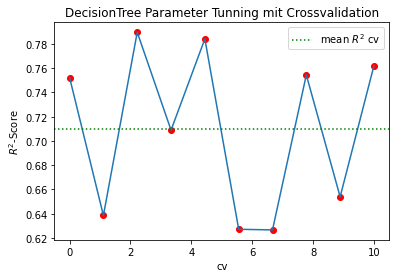

In [82]:
# create Decision Tree mit Crossvalidation
model_decTree1 = DecisionTreeRegressor(random_state=42, max_depth=8, min_samples_leaf=50)
cv_results = cross_val_score(model_decTree1, X_train, y_train_log, cv=10)
plt.plot(np.linspace(0,10, 10), cv_results)
plt.scatter(np.linspace(0,10, 10), cv_results, color='red')
plt.axhline(np.mean(cv_results), color='green', linestyle=':', label=r'mean $R^2$ cv')
plt.title('DecisionTree Parameter Tunning mit Crossvalidation')
plt.xlabel('cv')
plt.ylabel(r'$R^2$-Score')
plt.legend()
plt.show()

**Anwendung** der gefundenen Parameter mit Crossvalidation auf:
1. Nummerische Werte
1. Nummerische und Kategorische Werte (Dummy Variablen)

In [83]:
# create decision tree modell mit y Log-Transformation
model_decTree1 = DecisionTreeRegressor(random_state=42, max_depth=8,
                                      min_samples_leaf=50).fit(X_train_num, y_train_log)
y_pred_train_log = model_decTree1.predict(X_train_num)
y_pred_train = np.exp(y_pred_train_log)

y_pred_test_log = model_decTree1.predict(X_test_num)
y_pred_test = np.exp(y_pred_test_log)

# print param
print('depth Tree:', model_decTree1.get_depth())

# get Modell scores - Trainingsdaten
model_decTree1_r2_train,_ = RidgeRegression.get_scores(y_train, y_pred_train,
                                                       info='Scores Trainingsdaten:', print_info=True)

# get Modell scores - Testdaten
model_decTree1_r2_test,_ = RidgeRegression.get_scores(y_test, y_pred_test, 
                                                      info='Scores Testdaten:',print_info=True)

depth Tree: 8
Scores Trainingsdaten:
Modell score R^2 =  0.7538
Modell score MAE =  1575.5972
Scores Testdaten:
Modell score R^2 =  0.6791
Modell score MAE =  1676.7649


In [84]:
# create decision tree modell mit y Log-Transformation und Kategorischen Attributen
model_decTree2 = DecisionTreeRegressor(random_state=42, max_depth=8,
                                      min_samples_leaf=50).fit(X_train, y_train_log)
y_pred_train_log = model_decTree2.predict(X_train)
y_pred_train = np.exp(y_pred_train_log)

y_pred_test_log = model_decTree2.predict(X_test)
y_pred_test = np.exp(y_pred_test_log)

# print param
print('depth Tree:', model_decTree2.get_depth())

# get Modell scores - Trainingsdaten
model_decTree2_r2_train,_ = RidgeRegression.get_scores(y_train, y_pred_train,
                                                       info='Scores Trainingsdaten:', print_info=True)

# get Modell scores - Testdaten
model_decTree2_r2_test,_ = RidgeRegression.get_scores(y_test, y_pred_test, 
                                                      info='Scores Testdaten:',print_info=True)

depth Tree: 8
Scores Trainingsdaten:
Modell score R^2 =  0.7652
Modell score MAE =  1522.6761
Scores Testdaten:
Modell score R^2 =  0.7073
Modell score MAE =  1561.8942


Kurzer Test mit Corssvalidation um das Problem der einfachen Train / Test Split Methode zu zeigen. Je nach Split Glück reagiert der $R^2$-Score sehr heftig.

**3.Modell** Random Forrest (Regression)  

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

**RandomizedSearchCV** für Parameter Tunning des Random Forrest  
Für Regressionen stehen einige [scorings](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) zur Verfügung. Durch die Aufgabenstellung wird $R^2$ und MAE (MeanAbsolutError) benutzte:
scoring=`r2` und `neg_mean_absolute_error`.   

*Bemerkung: Dieser Teil dauert einen Moment*

In [86]:
# Parameter festlegen
param_grid = {'n_estimators': [100, 125, 150],
              'max_depth': [14, 16, 18, 20],
             'min_samples_leaf':[10, 30]}

# Modell erstellen
model_randForrest3 = RandomForestRegressor(random_state=42)

# GridSearch R2
grid_model1 = GridSearchCV(estimator=model_randForrest3,
                          param_grid=param_grid,
                          scoring='r2',
                          cv= 4,
                          verbose=1)
grid_model1.fit(X_train, y_train_log)
print('Best hyperparameters R2:\n', grid_model1.best_params_)

# GridSearch neg_mean_absolute_error
grid_model2 = GridSearchCV(estimator=model_randForrest3,
                          param_grid=param_grid,
                          scoring='neg_mean_absolute_error',
                          cv= 4,
                          verbose=1)
grid_model2.fit(X_train, y_train_log)
print('Best hyperparameters MAE:\n', grid_model2.best_params_)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
Best hyperparameters R2:
 {'max_depth': 18, 'min_samples_leaf': 10, 'n_estimators': 150}
Fitting 4 folds for each of 24 candidates, totalling 96 fits
Best hyperparameters MAE:
 {'max_depth': 18, 'min_samples_leaf': 10, 'n_estimators': 150}


GridSearch mit unterschiedlichen Scoring Methoden `r2` oder `neg_mean_absolute_error` führen in diesem Fall zum selben Ergebniss der Parameter. Der Unterschied liegt dabei im quadrieren Fehler, Ausreisser werden dabei stärker gewichtet als bei der Verwendung von absolut Werten.

**Anwendung** der gefundenen Parameter in RandomizedSearch auf:
1. Nummerische Werte
1. Nummerische und Kategorische Werte (Dummy Variablen)

In [87]:
# create decision tree modell mit y Log-Transformation
model_randForrest1 = RandomForestRegressor(random_state=42, n_estimators=150, max_depth=18,
                                      min_samples_leaf=10).fit(X_train_num, y_train_log)
y_pred_train_log = model_randForrest1.predict(X_train_num)
y_pred_train = np.exp(y_pred_train_log)

y_pred_test_log = model_randForrest1.predict(X_test_num)
y_pred_test = np.exp(y_pred_test_log)

# Feature importance
attributs_ranked = pd.Series(data=model_randForrest1.feature_importances_,
                        index= X_train_num.columns).sort_values(ascending=False)
print('Feature importance:')
print(attributs_ranked)
print()

# get Modell scores - Trainingsdaten
model_randForrest1_r2_train,_ = RidgeRegression.get_scores(y_train, y_pred_train,
                                                       info='Scores Trainingsdaten:', print_info=True)

# get Modell scores - Testdaten
model_randForrest1_r2_test,_ = RidgeRegression.get_scores(y_test, y_pred_test, 
                                                      info='Scores Testdaten:',print_info=True)

Feature importance:
displacement        0.572638
registration_age    0.253746
mileage             0.086465
performance         0.046305
curb_weight         0.040846
dtype: float64

Scores Trainingsdaten:
Modell score R^2 =  0.8536
Modell score MAE =  1105.5391
Scores Testdaten:
Modell score R^2 =  0.7666
Modell score MAE =  1300.3102


In [88]:
# create decision tree modell mit y Log-Transformation und Kategorischen Attributen
model_randForrest2 = RandomForestRegressor(random_state=42, n_estimators=150, max_depth=18,
                                      min_samples_leaf=10).fit(X_train, y_train_log)
y_pred_train_log = model_randForrest2.predict(X_train)
y_pred_train = np.exp(y_pred_train_log)

y_pred_test_log = model_randForrest2.predict(X_test)
y_pred_test = np.exp(y_pred_test_log)

# Feature importance
attributs_ranked = pd.Series(data=model_randForrest2.feature_importances_,
                        index= X_train.columns).sort_values(ascending=False)
print('Feature importance:')
print(attributs_ranked)
print()

# get Modell scores - Trainingsdaten
model_randForrest2_r2_train,_ = RidgeRegression.get_scores(y_train, y_pred_train,
                                                       info='Scores Trainingsdaten:', print_info=True)

# get Modell scores - Testdaten
model_randForrest2_r2_test,_ = RidgeRegression.get_scores(y_test, y_pred_test, 
                                                      info='Scores Testdaten:',print_info=True)

Feature importance:
displacement             0.536675
registration_age         0.253955
mileage                  0.075187
brand_Harley-davidson    0.055885
performance              0.037333
curb_weight              0.031499
brand_Ducati             0.002437
brand_Yamaha             0.002067
brand_Bmw                0.001548
brand_Honda              0.001241
has_mfk                  0.000713
brand_Aprilia            0.000491
brand_Suzuki             0.000390
brand_Kawasaki           0.000236
brand_Triumph            0.000203
brand_Ktm                0.000089
brand_Husqvarna          0.000050
brand_Buell              0.000002
dtype: float64

Scores Trainingsdaten:
Modell score R^2 =  0.8613
Modell score MAE =  1076.0023
Scores Testdaten:
Modell score R^2 =  0.7851
Modell score MAE =  1229.252


Mit Crossvalidation kann Überprüft werdn

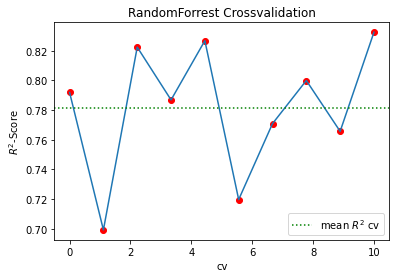

In [89]:
# create Random Forrest mit Crossvalidation
model_randForrest2 = RandomForestRegressor(random_state=42, n_estimators=150, max_depth=18, min_samples_leaf=10)
cv_results = cross_val_score(model_randForrest2, X_train, y_train_log, cv=10)

# plot
plt.plot(np.linspace(0,10, 10), cv_results)
plt.scatter(np.linspace(0,10, 10), cv_results, color='red')
plt.axhline(np.mean(cv_results), color='green', linestyle=':', label=r'mean $R^2$ cv')
plt.title('RandomForrest Crossvalidation')
plt.xlabel('cv')
plt.ylabel(r'$R^2$-Score')
plt.legend()
plt.show()

Die Scores varrieren je nach cv-Split noch stark. Da der Trainingsscore  höher als der Testscore ist, wird das Modell wohl etwas Overfitten.

### Aufgabe 10 (4 Punkte)

Stelle nun die Resultate der bisherigen Aufgaben und Modelle tabellarisch und graphisch übersichtlich dar und diskutiere sie.

In [90]:
# YOUR CODE HERE
info = ['Nummerische Inputdaten, nicht transformiert', 'Nummerische Daten und log(y) transformiert', 
       'Mit Dummy Var und log(y) transformiert']

res_dict = {'Model':['model_lin_disp','model_lin_disp', 'model_ridge_train', 'model_ridge_test',
                    'model_lasso1_train', 'model_lasso1_test', 'model_lasso2_train', 'model_lasso2_test',
                    'model_lasso3_train', 'model_lasso3_test', 'model_decTree1_train', 'model_decTree1_test',
                     'model_decTree2_train', 'model_decTree2_test', 'model_randForrest1_train',
                     'model_randForrest1_test', 'model_randForrest2_train', 'model_randForrest2_test'
                    ],
           'R2_score':[r2_simp_modell, r2_simp_modell_log,
                      model_ridge1_r2_train, model_ridge1_r2_test, model_lasso1_r2_train, 
                      model_lasso1_r2_test, model_lasso2_r2_train, model_lasso2_r2_test, 
                      model_lasso3_r2_train, model_lasso3_r2_test, model_decTree1_r2_train, 
                      model_decTree1_r2_test, model_decTree2_r2_train, model_decTree2_r2_test,
                      model_randForrest1_r2_train, model_randForrest1_r2_test,
                      model_randForrest2_r2_train, model_randForrest2_r2_test],
           'Beschreibung':[info[0], info[1], info[1], info[1], info[0], info[0],  info[1], info[1], info[2], info[2],
                          info[1], info[1], info[2], info[2], info[1], info[1], info[2], info[2]]  
           }

**Tabellarische Übersicht**

In [91]:
# Tabellarische Übersicht
result_models = pd.DataFrame(res_dict)
result_models

,Model,R2_score,Beschreibung
0,model_lin_disp,0.3734,"Nummerische Inputdaten, nicht transformiert"
1,model_lin_disp,0.4130,Nummerische Daten und log(y) transformiert
2,model_ridge_train,0.6382,Nummerische Daten und log(y) transformiert
3,model_ridge_test,0.6092,Nummerische Daten und log(y) transformiert
4,model_lasso1_train,0.6058,"Nummerische Inputdaten, nicht transformiert"
5,model_lasso1_test,0.5814,"Nummerische Inputdaten, nicht transformiert"
6,model_lasso2_train,0.6127,Nummerische Daten und log(y) transformiert
7,model_lasso2_test,0.5832,Nummerische Daten und log(y) transformiert
8,model_lasso3_train,0.6127,Mit Dummy Var und log(y) transformiert
9,model_lasso3_test,0.5832,Mit Dummy Var und log(y) transformiert


**Grafische Übersicht**

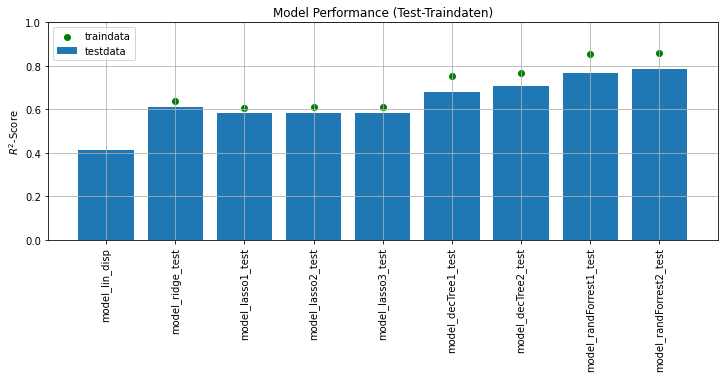

In [92]:
# best of model (testdata) als Barplot
model_train_scores = result_models.loc[::2,:]
model_test_scores = result_models.loc[1::2,:]

# plot
plt.figure(figsize=(12,4))
plt.bar(model_test_scores['Model'], model_test_scores['R2_score'], label='testdata')
plt.scatter(model_test_scores['Model'], model_train_scores['R2_score'], marker='o', color='green', label='traindata')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.title('Model Performance (Test-Traindaten)')
plt.ylabel(r'$R^2$-Score')
plt.legend()
plt.grid()
plt.show()

Der Barplot 'Model Performance' zeigt die Entwicklung des $R^2$-Scores zu den verschiedenen Modellen. Im einfachen Linearen Modell mit nur 'Displacement' als Attribut zeigt sich eine Korrealtion zum Preis. Es fehlt aber an zusätzlichen Informationen um eine gute Vorhersage für den Preis abzugeben.  
Die folgenden Modelle nutzen zusätzliche Informationen durch weitere Attribute. Wobei Ridge und Lasso (nicht gerade überraschend) zu einem ähnlichen $R^2$-Score führen. Im Gegensatz zu Lasso wird bei Ridge Regression den Einfluss eines Attributs nie Null. Somit werden bei hinzufügen Attributen immer leicht bessere Scores erreicht. Das heisst aber nicht dass das Modell besser ist, für einen besseren Vergleich wäre hier der $R_{adjusted}^2$ noch interessant (Dieser Berücksichtig die Anzahl verwendete Attribute).  

Der DecisionTree verbessert das Modell weiter. Modell 1 mit den rein Nummerischen Werten und ein verbessertes Modell 2 mit beigefügten Dummy Variablen der Kategorischen Attribute. Die Auswahl der Kategorischen Daten sollte vorsichtig passieren. Im Datensatz (wie im eda gezeigt) haben viele der Kategorischen Attribute viele Ausprägungen von denen aber die meisten sehr selten vorkommen. Auch hat sich ein begrenzen der Baumstruktur als hilfreich erwiesen. Ohne Begrenzung liegen die $R^2$-Scores zwischen Trainings und Testdaten sehr weit auseinander, was als Overfitting oder hohe Varianz bezeichnet wird. Ein Parameter Tunning ist hilfreich um das Thema Bias-Variance Tradeoff anzugehen.  

Das Erfolgreichste Modell, Random Forrest (Regression), verwendet mehrere Entscheidungsbäume die sich unterschiedlich entwickeln. Die einzelnen Resultate werden verglichen um die besten Parameter zu finden. Wie die Crossvalidation Grafik zeigt, sind die Scores im Schnitt besser als die vorherigen Modelle, dennoch varrieren die einzelen CV-Score recht stark. Das Betrachten der Feature Importance kann helfen um die relevanten Attribute zu finden (siehe model_randForrest2). Die Leistung, das Alter und die gefahrenen Kilometer des Motorrads fallen für die Preisvorhersage am meisten ins Gewicht.  
Es wurde versucht weitere Kategirische Attribute ('conditon') hinzuzufügen. Der $R^2$-Score hat sich dabei um 0.02 verbessert. Auch hier zeigt sich wieder dass das hinzufügen weitere Attribute den Score zwar verbessert, dies aber nur sehr wenig. Dafür wird das Modell komplexer. Auch hier wäre der $R_{adjusted}^2$ ein weiterer nützlicher Score um das hinzufügen nicht nützlicher Attribute zu unterbinden.

### Aufgabe 11 (8 Punkte)

Nun betrachten wir noch dein bestes Modell etwas vertieft. Trainiere diesen Modell-Ansatz auf jeweils $[\frac{1}{10}, \frac{2}{10}, \frac{3}{10}, .., \frac{10}{10}]$ der Trainingsdaten. Erstelle nun einen Plot bei welchem der Wert der Kostenfunktion für die Trainings- und Testdaten auf der y-Achse und der Trainingsdatenanteil auf der x-Achse liegen möge. Zeichne also zwei Kurven in dieses Koordinatensystem.

Schau dir dazu das Video von [Kilian Weinberger zu Model Selection](https://www.youtube.com/watch?v=a7cofmFgwIk&list=PLl8OlHZGYOQ7bkVbuRthEsaLr7bONzbXS&index=22) an.  

Interpretiere und diskutiere nun deine Einsichten zu Model Selection, Bias & Variance und Grösse des Datensatzes.

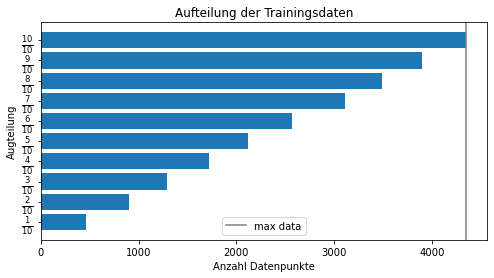

In [93]:
# YOUR CODE HERE
np.random.seed(42)
train_1_10 = df_train[ np.random.rand(len(df_train)) < 0.1 ]
train_2_10 = df_train[ np.random.rand(len(df_train)) < 0.2 ]
train_3_10 = df_train[ np.random.rand(len(df_train)) < 0.3 ]
train_4_10 = df_train[ np.random.rand(len(df_train)) < 0.4 ]
train_5_10 = df_train[ np.random.rand(len(df_train)) < 0.5 ]
train_6_10 = df_train[ np.random.rand(len(df_train)) < 0.6 ]
train_7_10 = df_train[ np.random.rand(len(df_train)) < 0.7 ]
train_8_10 = df_train[ np.random.rand(len(df_train)) < 0.8 ]
train_9_10 = df_train[ np.random.rand(len(df_train)) < 0.9 ]
train_10_10 = df_train[ np.random.rand(len(df_train)) < 1 ]

x_names = [r'$\frac{1}{10}$', r'$\frac{2}{10}$', r'$\frac{3}{10}$', r'$\frac{4}{10}$', r'$\frac{5}{10}$', 
           r'$\frac{6}{10}$', r'$\frac{7}{10}$', r'$\frac{8}{10}$', r'$\frac{9}{10}$', r'$\frac{10}{10}$']
y_lendata = [len(train_1_10), len(train_2_10), len(train_3_10), len(train_4_10), len(train_5_10),
            len(train_6_10), len(train_7_10), len(train_8_10), len(train_9_10), len(train_10_10),]

# Zeige Aufteilung der Daten mit np.random.rand
plt.figure(figsize=(8, 4))
plt.barh(x_names, y_lendata)
plt.axvline(len(df_train), color='grey', linestyle='-', label='max data')
plt.yticks(fontsize=12)
plt.title('Aufteilung der Trainingsdaten')
plt.xlabel('Anzahl Datenpunkte')
plt.ylabel('Augteilung')
plt.legend()
plt.show()

**Trainieren der Modell** auf den unterschiedlichen Trainingsdaten und **berechne Kostenfunktion**

\begin{equation}
J(\beta) = \sum_{i=1}^{N} \left(y^{(i)} - \beta_0 - \sum_{j=1}^{p}x_{j}^{(i)}\beta_{j}\right)^2
\end{equation}

\begin{equation}
J(\beta) = \sum_{i=1}^{N} \left(y^{(i)} - \hat{y}^{(i)}\right)^2
\end{equation}

Kostenfunktion angepasst (adjusted) mit Datengrösse $\frac{1}{N}$:

\begin{equation}
J(\beta) = \frac{1}{N} \sum_{i=1}^{N} \left(y^{(i)} - \beta_0 - \sum_{j=1}^{p}x_{j}^{(i)}\beta_{j}\right)^2
\end{equation}

\begin{equation}
J(\beta) = \frac{1}{N} \sum_{i=1}^{N} \left(y^{(i)} - \hat{y}^{(i)}\right)^2
\end{equation}

In [94]:
def costfunction(y, y_predicted, adjust_with_size=False):
    if adjust_with_size:
        cost = np.sum( (y - y_predicted)**2 ) / len(y_predicted)
    else:
        cost = np.sum( (y - y_predicted)**2 )
    return cost

In [95]:
#attr_modell = ['displacement', 'has_mfk', 'MPG', 'curb_weight', 'registration_age', 'mileage', 'brand']
split_traindata = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
costs_train = []
costs_train_adjusted = []
costs_test = []
costs_test_adjusted = []

# Attribute Preis der Testdaten (fix)
y_test = df_test['price']

for i, name in enumerate(x_names):
    
    # Aufteilung der Trainingsdaten (variable)
    df_train_x_10 = df_train[ np.random.rand(len(df_train)) < split_traindata[i] ]    
    
    # Erstelle X_train mit Datenaufteilung
    X_train = df_train_x_10[attr_modell]
    X_train = pd.get_dummies(X_train)
    
    # Erstelle y_train_log für Modell und y_train für Kostenfunktion
    y_train = df_train_x_10['price']
    y_train_log = np.log(y_train) 
    

    # ERstelle RandomForrest Modell mit y Log-Transformation und Kategorischen Attributen
    model_randForrest2 = RandomForestRegressor(random_state=42, n_estimators=125, max_depth=16,
                                          min_samples_leaf=10).fit(X_train, y_train_log)
    
    
    # Vorhersagen / Predictions auf Train-Testdaten. Mit np.exp() log-transf rückgängig
    y_pred_train = np.exp(model_randForrest2.predict(X_train))
    y_pred_test = np.exp(model_randForrest2.predict(X_test))
    
    # Berechne Kostenfunktion - Train / Test
    cost_train = costfunction(y_train, y_pred_train)
    cost_train_adjusted = costfunction(y_train, y_pred_train, adjust_with_size=True)
    costs_train.append(cost_train)
    costs_train_adjusted.append(cost_train_adjusted)
    
    cost_test = costfunction(y_test, y_pred_test)
    costs_test.append(cost_test)
    cost_test_adjusted = costfunction(y_test, y_pred_test, adjust_with_size=True)
    costs_test_adjusted.append(cost_test_adjusted)

**Plot zur Kostenfunktion** auf Trainings- und Testdaten

In [96]:
def plot_costs(costs_train, costs_test, xnames, title=''):
    plt.figure(figsize=(15,6))
    plt.plot(xnames, costs_train, color='red', label='costs train')
    plt.scatter(xnames, costs_train, color='grey')
    plt.plot(xnames, costs_test, color='green', label='costs test')
    plt.scatter(xnames, costs_test, color='grey')
    plt.xticks(fontsize=12)
    plt.title(title)
    plt.xlabel('Trainingsdatenanteil')
    plt.ylabel('Kostenfunktion')
    plt.legend()
    plt.grid()
    plt.show()

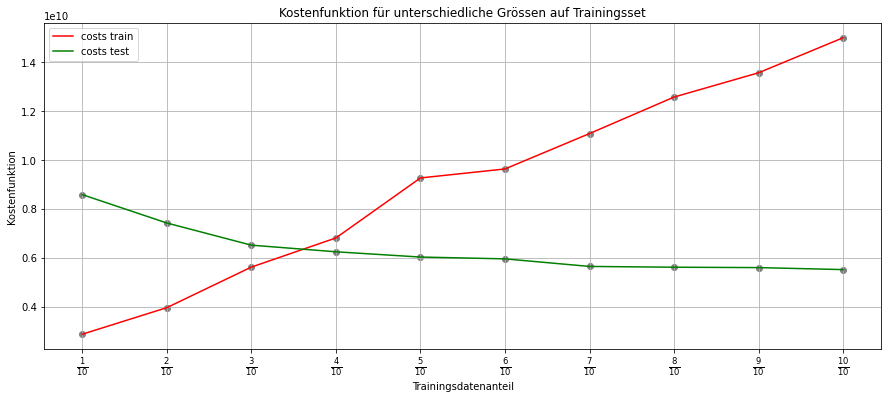

In [97]:
plot_costs(costs_train, costs_test, x_names,
           title='Kostenfunktion für unterschiedliche Grössen auf Trainingsset')

In der obigen Grafik, zur Kostenfunktion mit unterschiedlichen Datenanteilen, nimmt der Wert der Kostenfunktion für die Trainingsdaten kontinuerlich zu. Deshalb da die Unterschiede $y^{i} - \hat{y}^{i}$ quadriert und aufsummiert werden. Somit steigt der Wert der Kostenfunktion mit zunehmenden Datenpunkten. Die Kostenfunktion der Testdaten besteht aus einer festen Länge an Datenpunkten. Modelle mit höheren Trainingsdatenanteilen können besser trainiert werden. Als Folge sinkt die Kostenfunktion für die Testdaten.

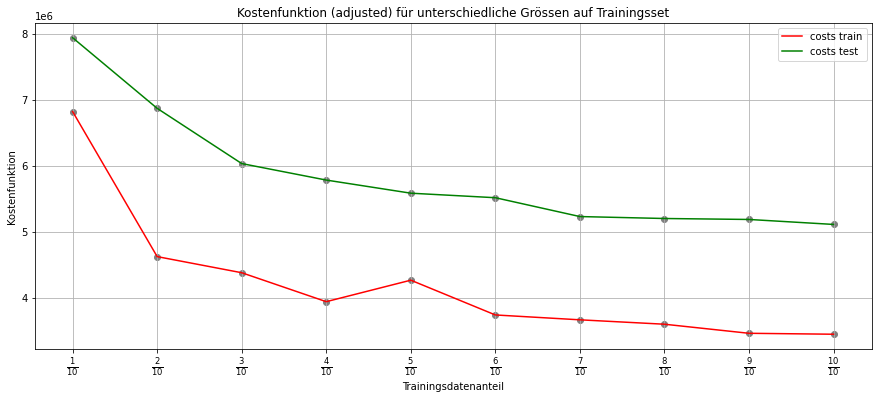

In [98]:
plot_costs(costs_train_adjusted, costs_test_adjusted, x_names,
           title='Kostenfunktion (adjusted) für unterschiedliche Grössen auf Trainingsset')

Um weitere Vergleiche zwischen Kostenfuntion auf den Trainingsdaten (mit unterschiedlichen Datenanteilen) und den Testdaten herzustellen, wurde die Kostenfunktion angepasst und mit $\frac{1}{N}$ ergänzt. Die resultierende Grafik zeigt nun eine Abnahme der Kostenfunktion für jeweils Test- und Trainingsdaten. Die Differenz der beiden Linien (höhere Kosten auf den Testdaten) entsteht dadurch, dass die Vorhersage des Modells auf den Trainingsdaten besser ist als auf den Testdaten. Dies kann auch in der Tabelarischen Ansicht von Aufgabe 10 gut ermittelt werden (Trainscores > Testscores)

Somit je mehr Daten zur Verfügung stehen umso besser können Modell trainiert werden. Dabei ist auf die Varianz zu achten, diese kann mit z.B einer RidgeRegression korrigiert werden. Die in dieser Challenge erstellten Grafiken können helfen Modelle zu trainieren und Rückschlüsse für Anpassungen / Verbesserungen zu ziehen.

**Ende gml - mini Challenge 1**  
Student: Manuel Schwarz